### Installing the package

Install once. Once the repo is public we can use the link to download

In [33]:
#!pip install -e .  #<--- Uncomment this line to install the package

### Packages 

Import Package

In [34]:
import pyvar as pv

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
from itertools import product

## PT 1: Univariate Models

Start with basic VaR models. Start with Vanguard Total World Stock ETF. It's one of the most popular ETFs used as a proxy for global equity markets.

In [36]:
# Download the VT data from YF
vt_data = yf.download("VT", start="2015-01-01", end="2025-01-01")

# Check for missing values in the entire DataFrame (including the new column)
print(vt_data.isnull().sum())

[*********************100%***********************]  1 of 1 completed

Price   Ticker
Close   VT        0
High    VT        0
Low     VT        0
Open    VT        0
Volume  VT        0
dtype: int64


In [37]:
# Compute percentage returns and remove the first NaN
vt_data["Percent Returns"] = vt_data["Close"].pct_change()
vt_returns = vt_data["Percent Returns"].dropna()

In [38]:
vt_returns.head()

Date
2015-01-05   -0.019346
2015-01-06   -0.010034
2015-01-07    0.012884
2015-01-08    0.015095
2015-01-09   -0.006683
Name: Percent Returns, dtype: float64

General setup:

In [39]:
# Set parameters
confidence_level = 0.99 # <----- Can choose 0.95 etc

### Parametric Normal

In [ ]:
# Apply Parametric VaR model 
parametric_normal_results = pv.parametric_var(vt_returns, confidence_level, distribution="normal")

# Compute ES for the whole period
parametric_normal_results = pv.parametric_es(parametric_normal_results, confidence_level, distribution="normal")

# Plot backtest
plot_parametric_normal = pv.plot_backtest(parametric_normal_results, interactive=False)


In [55]:
parametric_normal_results.head()

Returns       VaR  VaR Violation       ES
Date                                                  
2015-01-05 -0.019346  0.025147          False  0.02881
2015-01-06 -0.010034  0.025147          False  0.02881
2015-01-07  0.012884  0.025147          False  0.02881
2015-01-08  0.015095  0.025147          False  0.02881
2015-01-09 -0.006683  0.025147          False  0.02881

In [62]:
# Count violations
parametric_normal_violations, parametric_normal_violation_rate = pv.count_violations(parametric_normal_results)

# Kupiec Test (Unconditional Coverage)
parametric_normal_kupiec = pv.kupiec_test(
    total_violations=parametric_normal_violations,
    total_days=len(parametric_normal_results),
    confidence_level=confidence_level
)

# Christoffersen Test (Independence)
parametric_normal_christoffersen = pv.christoffersen_test(parametric_normal_results)

# Joint Test (Conditional Coverage)
parametric_normal_joint = pv.joint_lr_test(
    LR_uc=parametric_normal_kupiec["LR_uc"],
    LR_c=parametric_normal_christoffersen["LR_c"]
)

# Summary output
print(f"\n--- Parametric Normal VaR Backtesting Summary ---")
print(f"Total Violations     : {parametric_normal_violations}")
print(f"Violation Rate       : {parametric_normal_violation_rate * 100:.2f}%\n")

print("Kupiec Test (UC):")
print(f"LR_uc               : {parametric_normal_kupiec['LR_uc']:.4f}")
print(f"p-value             : {parametric_normal_kupiec['p_value']:.4f}")
print(f"Reject Null (5%)    : {parametric_normal_kupiec['reject_null']}")

print("\nChristoffersen Test (Independence):")
print(f"LR_c                : {parametric_normal_christoffersen['LR_c']:.4f}")
print(f"p-value             : {parametric_normal_christoffersen['p_value']:.4f}")
print(f"Reject Null (5%)    : {parametric_normal_christoffersen['reject_null']}")

print("\nJoint Test (Conditional Coverage):")
print(f"LR_total            : {parametric_normal_joint['LR_total']:.4f}")
print(f"p-value             : {parametric_normal_joint['p_value']:.4f}")
print(f"Reject Null (5%)    : {parametric_normal_joint['reject_null']}")


--- Parametric Normal VaR Backtesting Summary ---
Total Violations     : 44
Violation Rate       : 1.75%

Kupiec Test (UC):
LR_uc               : 11.6643
p-value             : 0.0006
Reject Null (5%)    : True

Christoffersen Test (Independence):
LR_c                : 3.9355
p-value             : 0.0473
Reject Null (5%)    : True

Joint Test (Conditional Coverage):
LR_total            : 15.5998
p-value             : 0.0004
Reject Null (5%)    : True


### Parametric Student's t


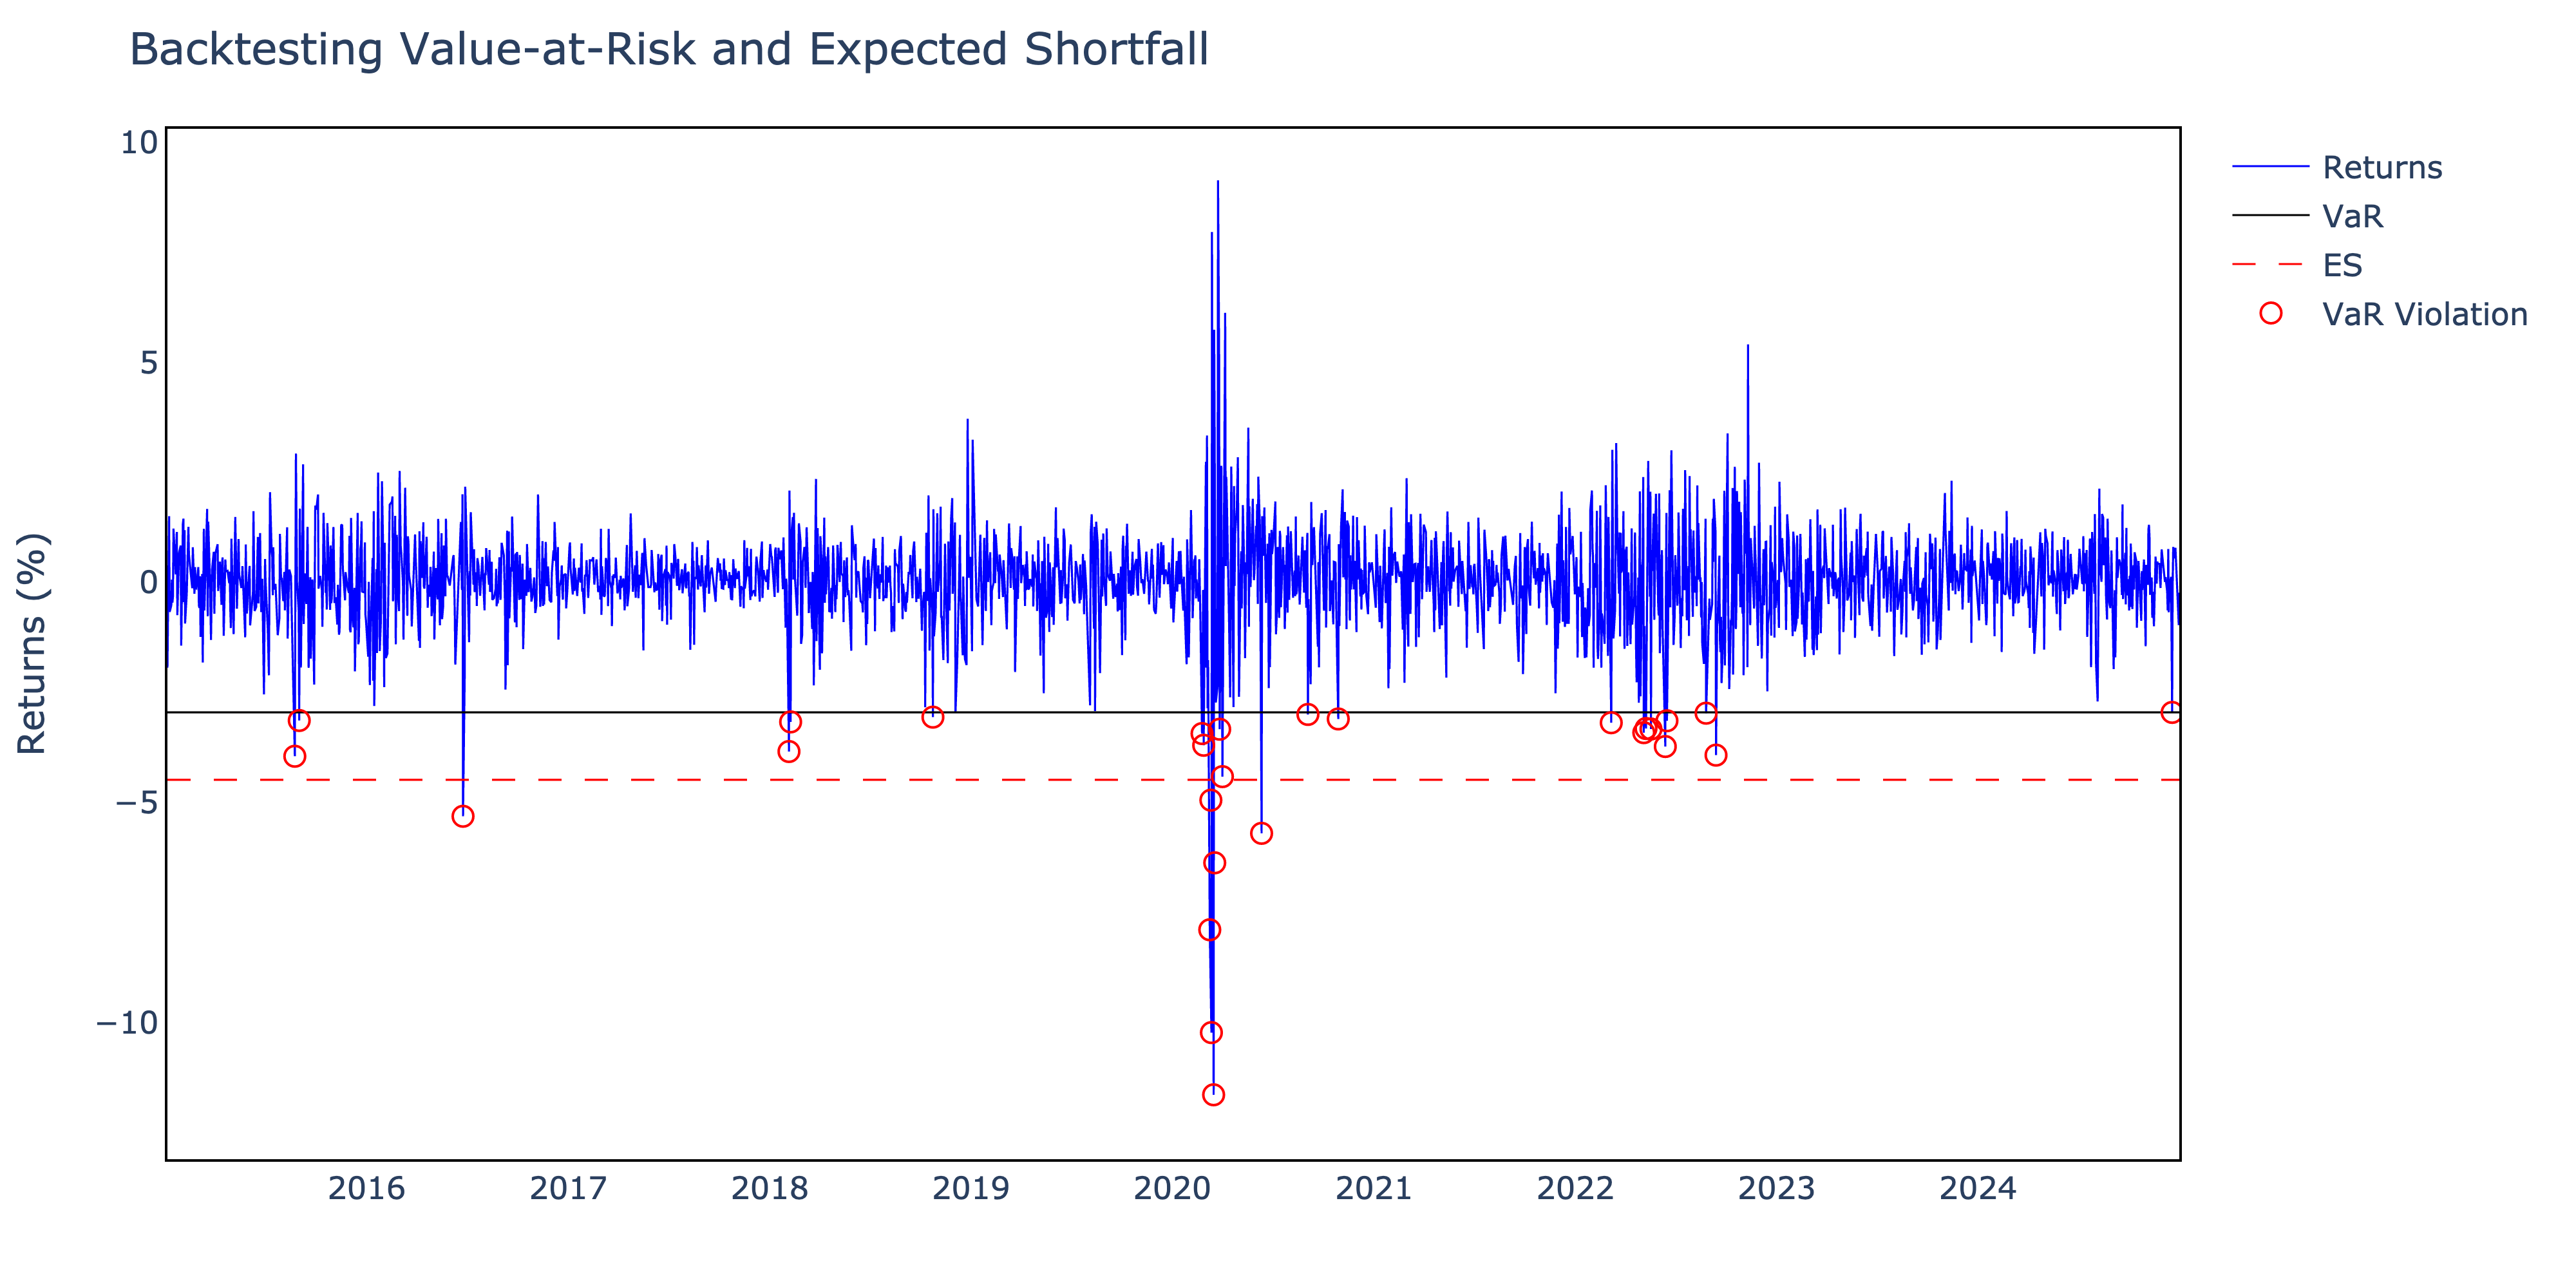

In [ ]:
# Apply Parametric VaR model 
parametric_t_results = pv.parametric_var(vt_returns, confidence_level, distribution="t")

# Compute ES for the whole period
parametric_t_results = pv.parametric_es(parametric_t_results, confidence_level, distribution="t")

# Plot backtest
plot_parametric_t = pv.plot_backtest(parametric_t_results, interactive=False)


In [64]:
parametric_t_results.head()

Returns       VaR  VaR Violation        ES
Date                                                   
2015-01-05 -0.019346  0.029483          False  0.044821
2015-01-06 -0.010034  0.029483          False  0.044821
2015-01-07  0.012884  0.029483          False  0.044821
2015-01-08  0.015095  0.029483          False  0.044821
2015-01-09 -0.006683  0.029483          False  0.044821

In [65]:
# Backtesting: Parametric t-distribution VaR

# Count violations
parametric_t_violations, parametric_t_violation_rate = pv.count_violations(parametric_t_results)

# Kupiec Test (Unconditional Coverage)
parametric_t_kupiec = pv.kupiec_test(
    total_violations=parametric_t_violations,
    total_days=len(parametric_t_results),
    confidence_level=confidence_level
)

# Christoffersen Test (Independence)
parametric_t_christoffersen = pv.christoffersen_test(parametric_t_results)

# Joint Test (Conditional Coverage)
parametric_t_joint = pv.joint_lr_test(
    LR_uc=parametric_t_kupiec["LR_uc"],
    LR_c=parametric_t_christoffersen["LR_c"]
)

# Summary output
print(f"\n--- Parametric t-distribution VaR Backtesting Summary ---")
print(f"Total Violations     : {parametric_t_violations}")
print(f"Violation Rate       : {parametric_t_violation_rate * 100:.2f}%\n")

print("Kupiec Test (UC):")
print(f"LR_uc               : {parametric_t_kupiec['LR_uc']:.4f}")
print(f"p-value             : {parametric_t_kupiec['p_value']:.4f}")
print(f"Reject Null (5%)    : {parametric_t_kupiec['reject_null']}")

print("\nChristoffersen Test (Independence):")
print(f"LR_c                : {parametric_t_christoffersen['LR_c']:.4f}")
print(f"p-value             : {parametric_t_christoffersen['p_value']:.4f}")
print(f"Reject Null (5%)    : {parametric_t_christoffersen['reject_null']}")

print("\nJoint Test (Conditional Coverage):")
print(f"LR_total            : {parametric_t_joint['LR_total']:.4f}")
print(f"p-value             : {parametric_t_joint['p_value']:.4f}")
print(f"Reject Null (5%)    : {parametric_t_joint['reject_null']}")



--- Parametric t-distribution VaR Backtesting Summary ---
Total Violations     : 27
Violation Rate       : 1.07%

Kupiec Test (UC):
LR_uc               : 0.1342
p-value             : 0.7141
Reject Null (5%)    : False

Christoffersen Test (Independence):
LR_c                : 1.0942
p-value             : 0.2956
Reject Null (5%)    : False

Joint Test (Conditional Coverage):
LR_total            : 1.2284
p-value             : 0.5411
Reject Null (5%)    : False


### Historical VaR


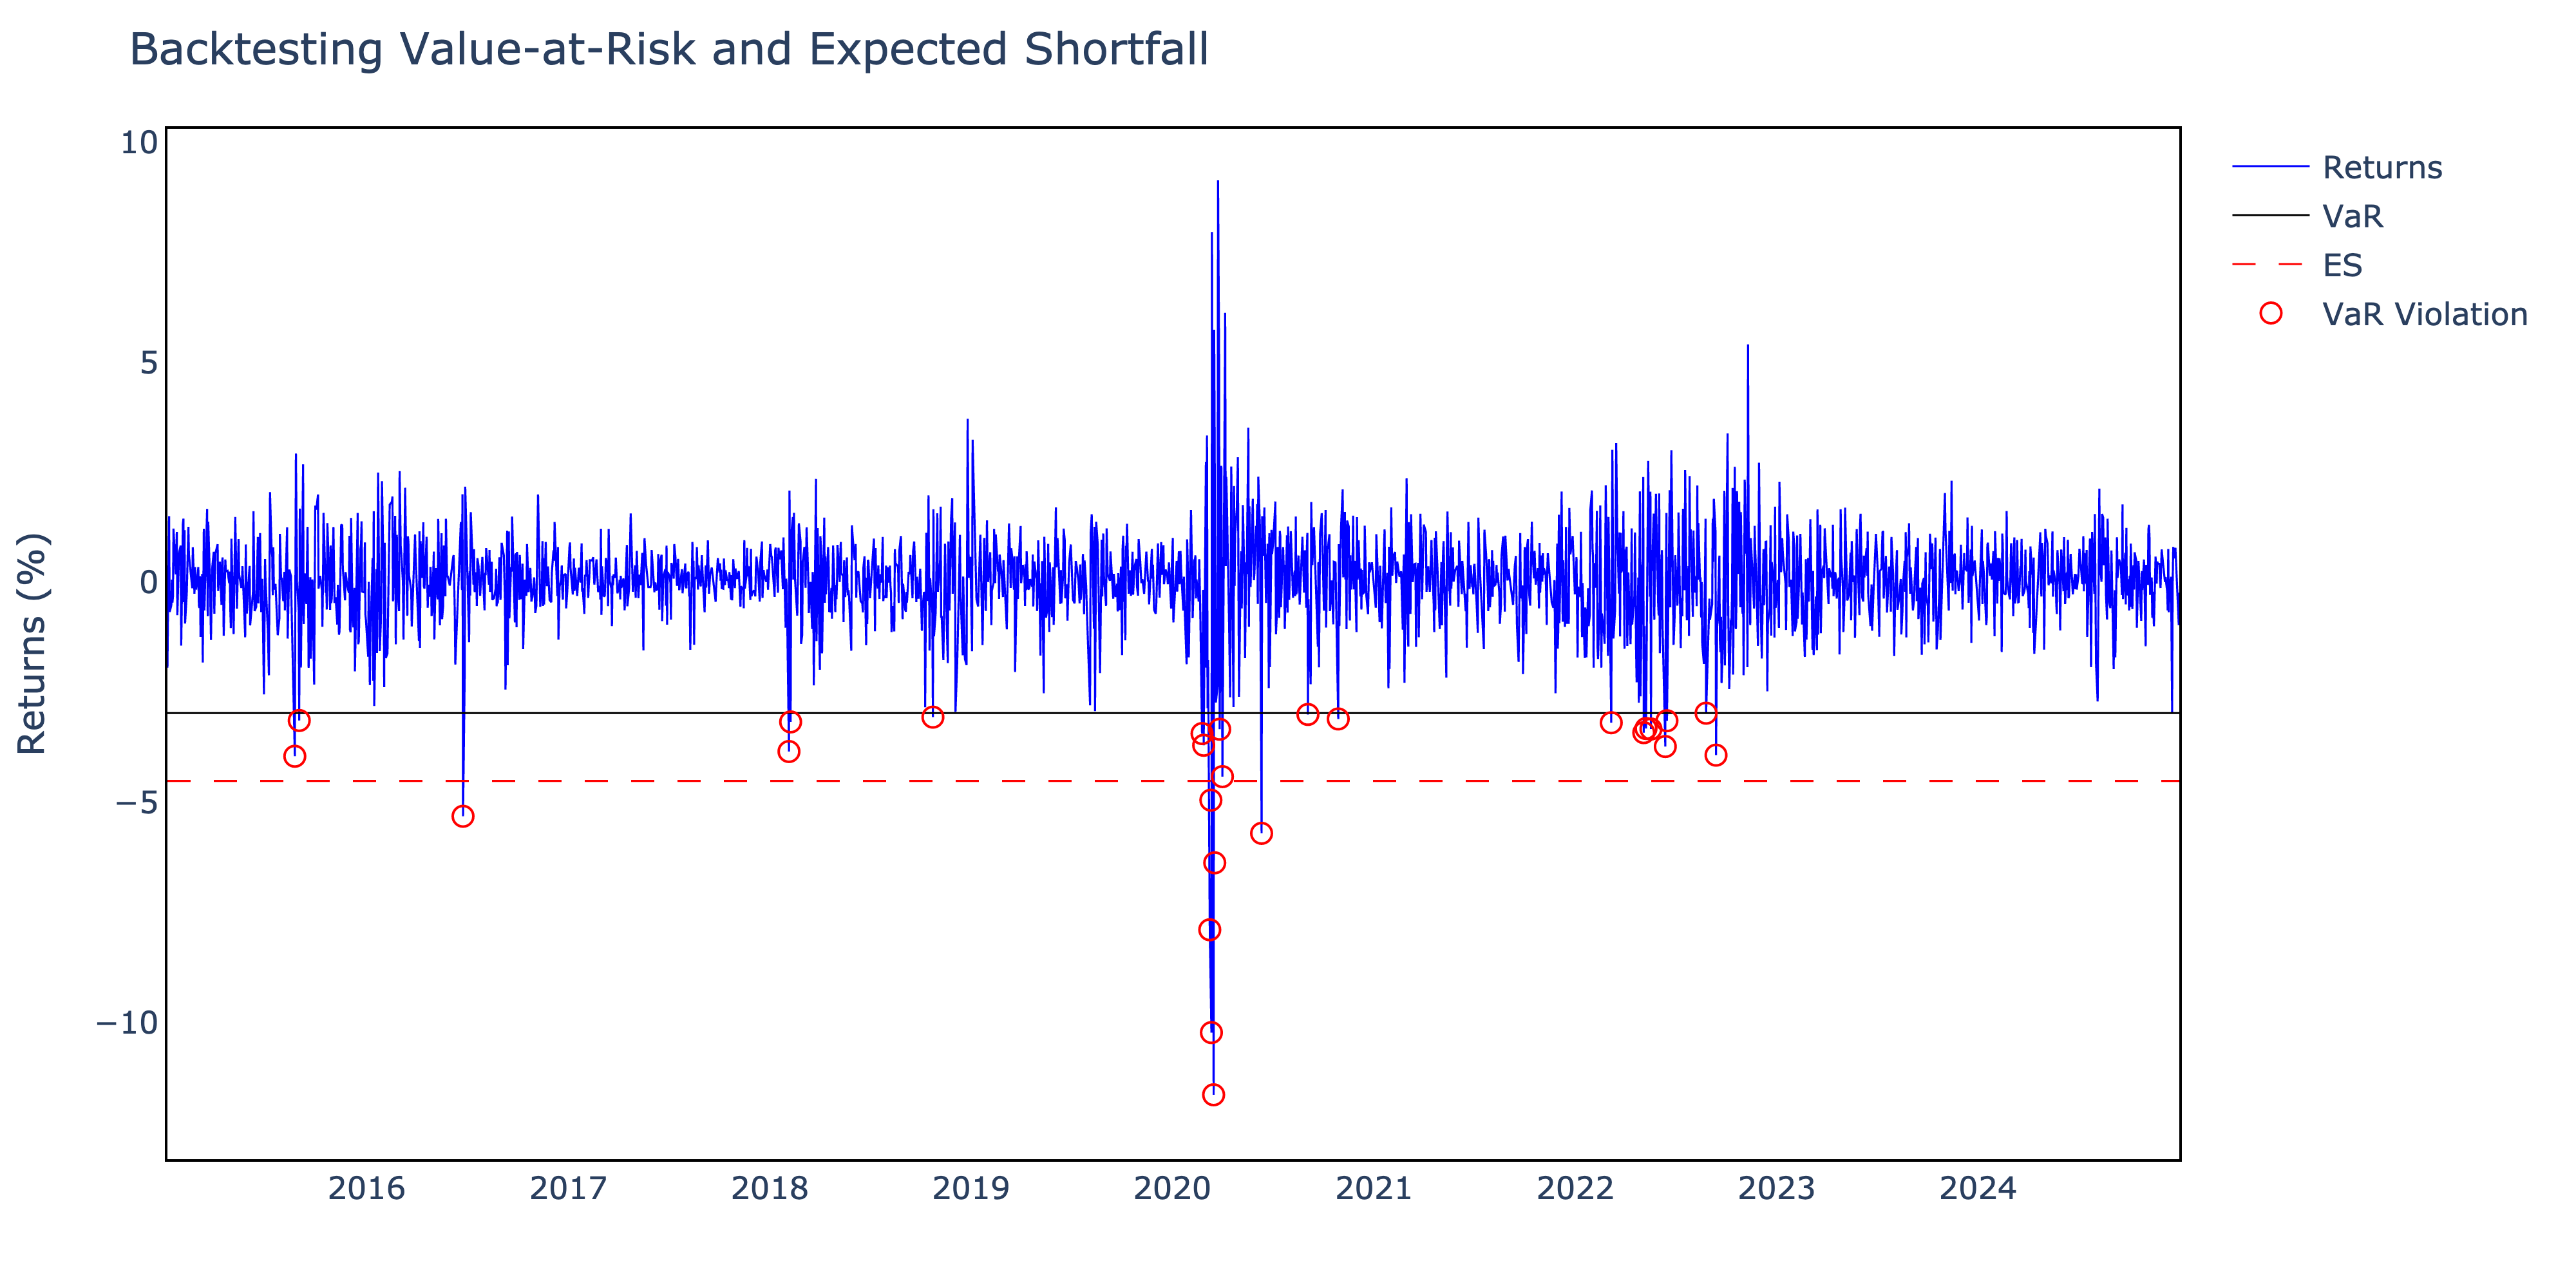

In [ ]:
# Apply Parametric VaR model 
historical_results = pv.historical_var(vt_returns, confidence_level)

# Compute ES for the whole period
historical_results = pv.historical_es(historical_results, confidence_level)

# Plot backtest
plot_historical = pv.plot_backtest(historical_results, interactive=False)


In [68]:
historical_results.head()

Returns       VaR  VaR Violation       ES  ES_monetary
Date                                                               
2015-01-05 -0.019346  0.029661          False  0.04508     0.044629
2015-01-06 -0.010034  0.029661          False  0.04508     0.044629
2015-01-07  0.012884  0.029661          False  0.04508     0.044629
2015-01-08  0.015095  0.029661          False  0.04508     0.044629
2015-01-09 -0.006683  0.029661          False  0.04508     0.044629

In [69]:
# Count violations
historical_violations, historical_violation_rate = pv.count_violations(historical_results)

# Kupiec Test (Unconditional Coverage)
historical_kupiec = pv.kupiec_test(
    total_violations=historical_violations,
    total_days=len(historical_results),
    confidence_level=confidence_level
)

# Christoffersen Test (Independence)
historical_christoffersen = pv.christoffersen_test(historical_results)

# Joint Test (Conditional Coverage)
historical_joint = pv.joint_lr_test(
    LR_uc=historical_kupiec["LR_uc"],
    LR_c=historical_christoffersen["LR_c"]
)

# Summary output
print(f"\n--- Historical Simulation VaR Backtesting Summary ---")
print(f"Total Violations     : {historical_violations}")
print(f"Violation Rate       : {historical_violation_rate * 100:.2f}%\n")

print("Kupiec Test (UC):")
print(f"LR_uc               : {historical_kupiec['LR_uc']:.4f}")
print(f"p-value             : {historical_kupiec['p_value']:.4f}")
print(f"Reject Null (5%)    : {historical_kupiec['reject_null']}")

print("\nChristoffersen Test (Independence):")
print(f"LR_c                : {historical_christoffersen['LR_c']:.4f}")
print(f"p-value             : {historical_christoffersen['p_value']:.4f}")
print(f"Reject Null (5%)    : {historical_christoffersen['reject_null']}")

print("\nJoint Test (Conditional Coverage):")
print(f"LR_total            : {historical_joint['LR_total']:.4f}")
print(f"p-value             : {historical_joint['p_value']:.4f}")
print(f"Reject Null (5%)    : {historical_joint['reject_null']}")



--- Historical Simulation VaR Backtesting Summary ---
Total Violations     : 26
Violation Rate       : 1.03%

Kupiec Test (UC):
LR_uc               : 0.0287
p-value             : 0.8655
Reject Null (5%)    : False

Christoffersen Test (Independence):
LR_c                : 1.2068
p-value             : 0.2720
Reject Null (5%)    : False

Joint Test (Conditional Coverage):
LR_total            : 1.2355
p-value             : 0.5391
Reject Null (5%)    : False


### EVT


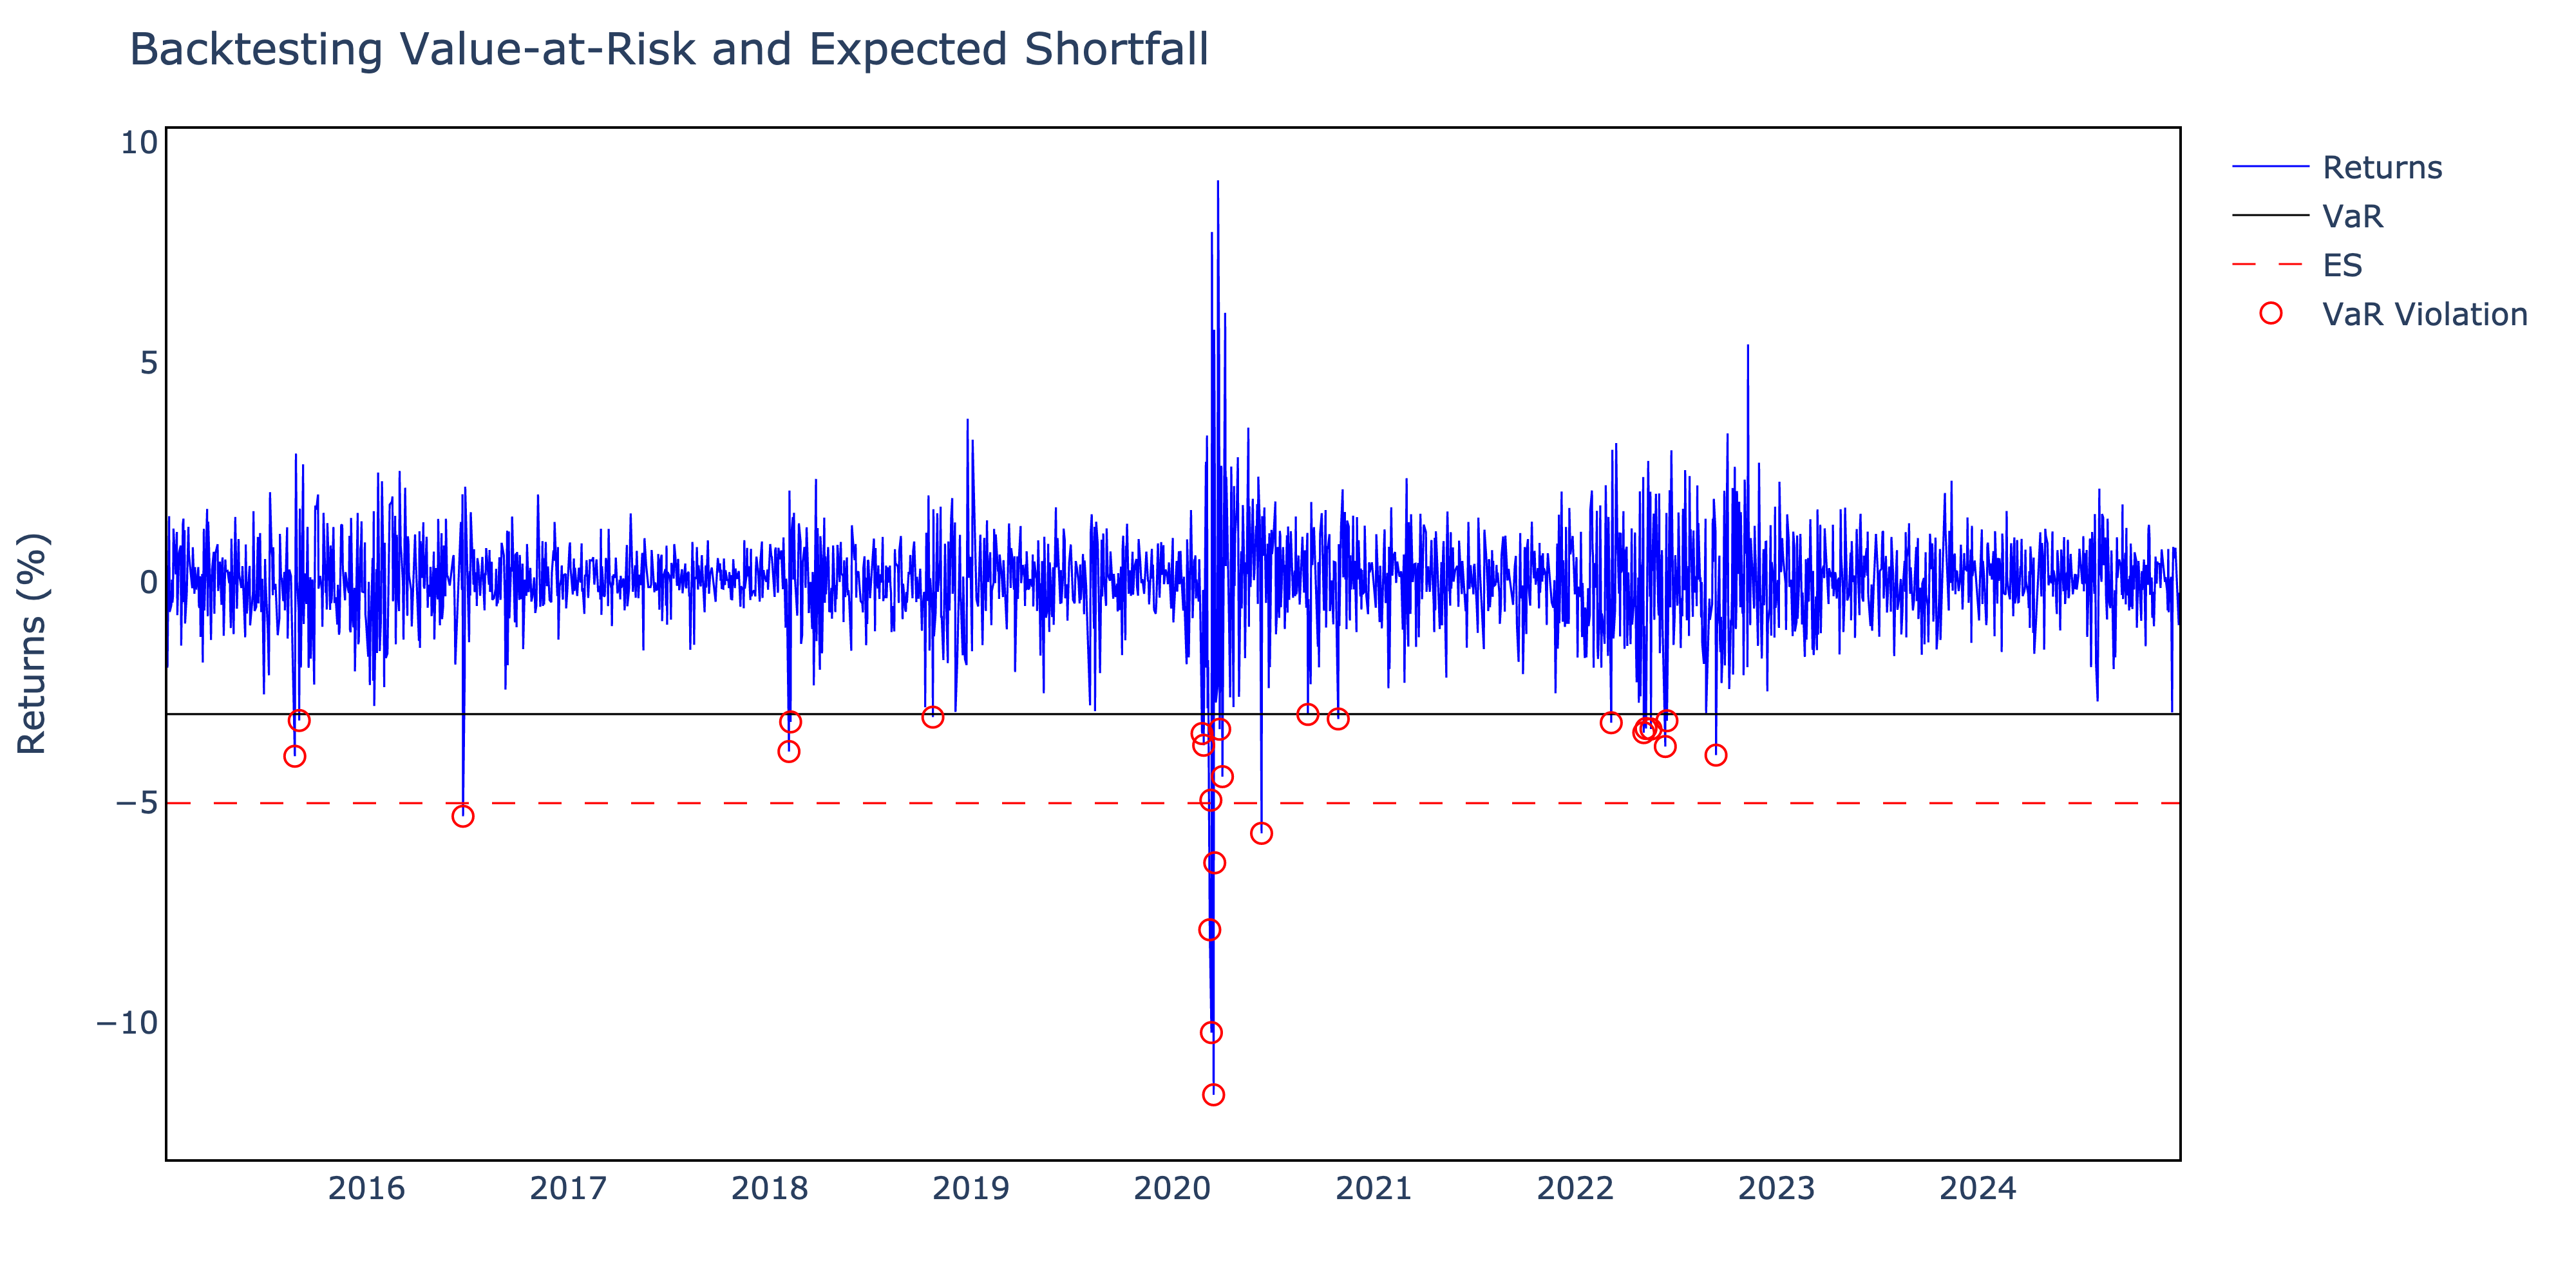

In [75]:
# Apply EVT model
evt_results = pv.evt_var(
    returns=vt_returns,
    confidence_level=confidence_level,
    threshold_percentile=99
    )

# ES
evt_results = pv.evt_es(
    result_data=evt_results,
    threshold_percentile=99
    )

# Plot backtest
plot_evt = pv.plot_backtest(evt_results, interactive=False)

In [76]:
evt_results.head()

Returns       VaR  VaR Violation        ES
Date                                                   
2015-01-05 -0.019346  0.029905          False  0.050127
2015-01-06 -0.010034  0.029905          False  0.050127
2015-01-07  0.012884  0.029905          False  0.050127
2015-01-08  0.015095  0.029905          False  0.050127
2015-01-09 -0.006683  0.029905          False  0.050127

In [77]:
# Count violations
evt_violations, evt_violation_rate = pv.count_violations(evt_results)

# Kupiec Test (Unconditional Coverage)
evt_kupiec = pv.kupiec_test(
    total_violations=evt_violations,
    total_days=len(evt_results),
    confidence_level=confidence_level
)

# Christoffersen Test (Independence)
evt_christoffersen = pv.christoffersen_test(evt_results)

# Joint Test (Conditional Coverage)
evt_joint = pv.joint_lr_test(
    LR_uc=evt_kupiec["LR_uc"],
    LR_c=evt_christoffersen["LR_c"]
)

# Summary output
print(f"\n--- EVT VaR Backtesting Summary ---")
print(f"Total Violations     : {evt_violations}")
print(f"Violation Rate       : {evt_violation_rate * 100:.2f}%\n")

print("Kupiec Test (UC):")
print(f"LR_uc               : {evt_kupiec['LR_uc']:.4f}")
print(f"p-value             : {evt_kupiec['p_value']:.4f}")
print(f"Reject Null (5%)    : {evt_kupiec['reject_null']}")

print("\nChristoffersen Test (Independence):")
print(f"LR_c                : {evt_christoffersen['LR_c']:.4f}")
print(f"p-value             : {evt_christoffersen['p_value']:.4f}")
print(f"Reject Null (5%)    : {evt_christoffersen['reject_null']}")

print("\nJoint Test (Conditional Coverage):")
print(f"LR_total            : {evt_joint['LR_total']:.4f}")
print(f"p-value             : {evt_joint['p_value']:.4f}")
print(f"Reject Null (5%)    : {evt_joint['reject_null']}")



--- EVT VaR Backtesting Summary ---
Total Violations     : 25
Violation Rate       : 0.99%

Kupiec Test (UC):
LR_uc               : 0.0009
p-value             : 0.9760
Reject Null (5%)    : False

Christoffersen Test (Independence):
LR_c                : 1.3273
p-value             : 0.2493
Reject Null (5%)    : False

Joint Test (Conditional Coverage):
LR_total            : 1.3282
p-value             : 0.5147
Reject Null (5%)    : False


### Volatility Modelling

In [79]:
# Apply GARCH volatility model
garch_results, next_day_var = pv.garch_var(vt_returns, confidence_level, model="GJR", distribution="skewt")

print(f"Next-day GARCH VaR estimate (abs): {100 * next_day_var:.2f}%")

# Compute ES for the whole period
garch_results = pv.volatility_es(garch_results, confidence_level)

Next-day GARCH VaR estimate (abs): 2.98%


In [80]:
# Plot interactive VaR
fig_var = pv.plot_backtest(garch_results, subset=("2015-11-30", "2017-11-30"), interactive = True)

# Plot interactive volatility for a subset
fig_vol = pv.plot_volatility(garch_results["Volatility"], subset=("2015-11-01", "2020-11-30"), interactive=True)

Forecasting

In [84]:
steps_list = [3, 10, 20]
cumulative_list = [False, True]

print("\n--- GARCH(1,1) VaR Forecasts (99% Confidence) ---")
for steps, is_cumulative in product(steps_list, cumulative_list):
    try:
        var_estimate = pv.forecast_garch_var(
            returns=vt_returns,
            steps_ahead=steps,
            cumulative=is_cumulative,
            confidence_level=0.99
        )
        tag = "CUM" if is_cumulative else "Single"
        print(f"VaR | {steps}-day | {tag:<6}: {var_estimate * 100:.4f}%")
    except Exception as e:
        print(f"VaR | {steps}-day | {tag:<6}: ERROR → {e}")

print("\n--- GARCH(1,1) Volatility Forecasts ---")
for steps, is_cumulative in product(steps_list, cumulative_list):
    try:
        variance = pv.forecast_garch_variance(
            returns=vt_returns,
            steps_ahead=steps,
            cumulative=is_cumulative
        )
        vol_pct = np.sqrt(variance) * 100
        tag = "CUM" if is_cumulative else "Single"
        print(f"Volatility | {steps}-day | {tag:<6}: {vol_pct:.4f}%")
    except Exception as e:
        print(f"Volatility | {steps}-day | {tag:<6}: ERROR → {e}")



--- GARCH(1,1) VaR Forecasts (99% Confidence) ---
VaR | 3-day | Single: 2.8048%
VaR | 3-day | CUM   : 4.8150%
VaR | 10-day | Single: 2.8799%
VaR | 10-day | CUM   : 8.9209%
VaR | 20-day | Single: 2.9620%
VaR | 20-day | CUM   : 12.8371%

--- GARCH(1,1) Volatility Forecasts ---
Volatility | 3-day | Single: 0.9676%
Volatility | 3-day | CUM   : 1.6610%
Volatility | 10-day | Single: 0.9935%
Volatility | 10-day | CUM   : 3.0774%
Volatility | 20-day | Single: 1.0218%
Volatility | 20-day | CUM   : 4.4283%


In [85]:
# Count violations
garch_violations, garch_violation_rate = pv.count_violations(garch_results)

# Kupiec Test (Unconditional Coverage)
garch_kupiec = pv.kupiec_test(
    total_violations=garch_violations,
    total_days=len(garch_results),
    confidence_level=confidence_level
)

# Christoffersen Test (Independence)
garch_christoffersen = pv.christoffersen_test(garch_results)

# Joint Test (Conditional Coverage)
garch_joint = pv.joint_lr_test(
    LR_uc=garch_kupiec["LR_uc"],
    LR_c=garch_christoffersen["LR_c"]
)

# Summary output
print(f"\n--- GARCH VaR Backtesting Summary (GJR, skewed-t) ---")
print(f"Total Violations     : {garch_violations}")
print(f"Violation Rate       : {garch_violation_rate * 100:.2f}%\n")

print("Kupiec Test (UC):")
print(f"LR_uc               : {garch_kupiec['LR_uc']:.4f}")
print(f"p-value             : {garch_kupiec['p_value']:.4f}")
print(f"Reject Null (5%)    : {garch_kupiec['reject_null']}")

print("\nChristoffersen Test (Independence):")
print(f"LR_c                : {garch_christoffersen['LR_c']:.4f}")
print(f"p-value             : {garch_christoffersen['p_value']:.4f}")
print(f"Reject Null (5%)    : {garch_christoffersen['reject_null']}")

print("\nJoint Test (Conditional Coverage):")
print(f"LR_total            : {garch_joint['LR_total']:.4f}")
print(f"p-value             : {garch_joint['p_value']:.4f}")
print(f"Reject Null (5%)    : {garch_joint['reject_null']}")



--- GARCH VaR Backtesting Summary (GJR, skewed-t) ---
Total Violations     : 26
Violation Rate       : 1.03%

Kupiec Test (UC):
LR_uc               : 0.0287
p-value             : 0.8655
Reject Null (5%)    : False

Christoffersen Test (Independence):
LR_c                : 1.2068
p-value             : 0.2720
Reject Null (5%)    : False

Joint Test (Conditional Coverage):
LR_total            : 1.2355
p-value             : 0.5391
Reject Null (5%)    : False


## PT 2: Portfolio Models

Highly diversified global equity strategy: long global, regional, and sector ETFs (VT, VGK, EWJ, VWO, SPY) and stable leaders in tech, healthcare, and consumer sectors (AAPL, JNJ, PG, UNH, NVS); small short in industrials (XLI) as a cyclical hedge. Portfolio valued in CHF.

In [105]:
# Long positions — diversified globally and across sectors
long_positions = pd.Series({
    "VT": 120_000,     # Global equity ETF
    "SPY": 80_000,     # US large-cap ETF
    "VGK": 60_000,     # Europe ETF
    "EWJ": 40_000,     # Japan ETF
    "VWO": 40_000,     # Emerging Markets ETF
    "AAPL": 50_000,    # Apple — tech
    "JNJ": 50_000,     # Johnson & Johnson — healthcare
    "PG": 40_000,      # Procter & Gamble — consumer staples
    "UNH": 40_000,     # UnitedHealth — healthcare
    "NVS": 30_000      # Novartis — Swiss healthcare
})

# Small short hedge — broad cyclical sector ETF
short_positions = pd.Series({
    "XLI": -30_000     # US industrials sector ETF (cyclical hedge)
})

# Combine long and short positions
monetary_positions = pd.concat([long_positions, short_positions])

# Tickers list
tickers = monetary_positions.index.tolist()

# Download and convert price data
raw_prices = pv.get_raw_prices(tickers, start="2020-01-01", end="2025-01-01")
prices_chf = pv.convert_to_base(raw_prices, base_currency="CHF")

# Create portfolio matrix
portfolio_matrix = pv.create_portfolio(prices_chf, monetary_positions)

# Compute returns and summary statistics
portfolio_returns, average_returns, vcv_matrix = pv.summary_statistics(portfolio_matrix)

# Final portfolio value in CHF
portfolio_value_chf = portfolio_matrix.sum(axis=1).iloc[-1]
print(f"\nFinal portfolio value in CHF: {portfolio_value_chf:,.2f}")


[currency detection] AAPL: USD
[currency detection] EWJ: USD
[currency detection] JNJ: USD
[currency detection] NVS: USD
[currency detection] PG: USD
[currency detection] SPY: USD
[currency detection] UNH: USD
[currency detection] VGK: USD
[currency detection] VT: USD
[currency detection] VWO: USD
[currency detection] XLI: USD
[fx download] Downloading FX pairs: CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] EWJ: USD → CHF via CHFUSD=X
[conversion] JNJ: USD → CHF via CHFUSD=X
[conversion] NVS: USD → CHF via CHFUSD=X
[conversion] PG: USD → CHF via CHFUSD=X
[conversion] SPY: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X
[conversion] VGK: USD → CHF via CHFUSD=X
[conversion] VT: USD → CHF via CHFUSD=X
[conversion] VWO: USD → CHF via CHFUSD=X
[conversion] XLI: USD → CHF via CHFUSD=X

Final portfolio value in CHF: 103,280,794.94



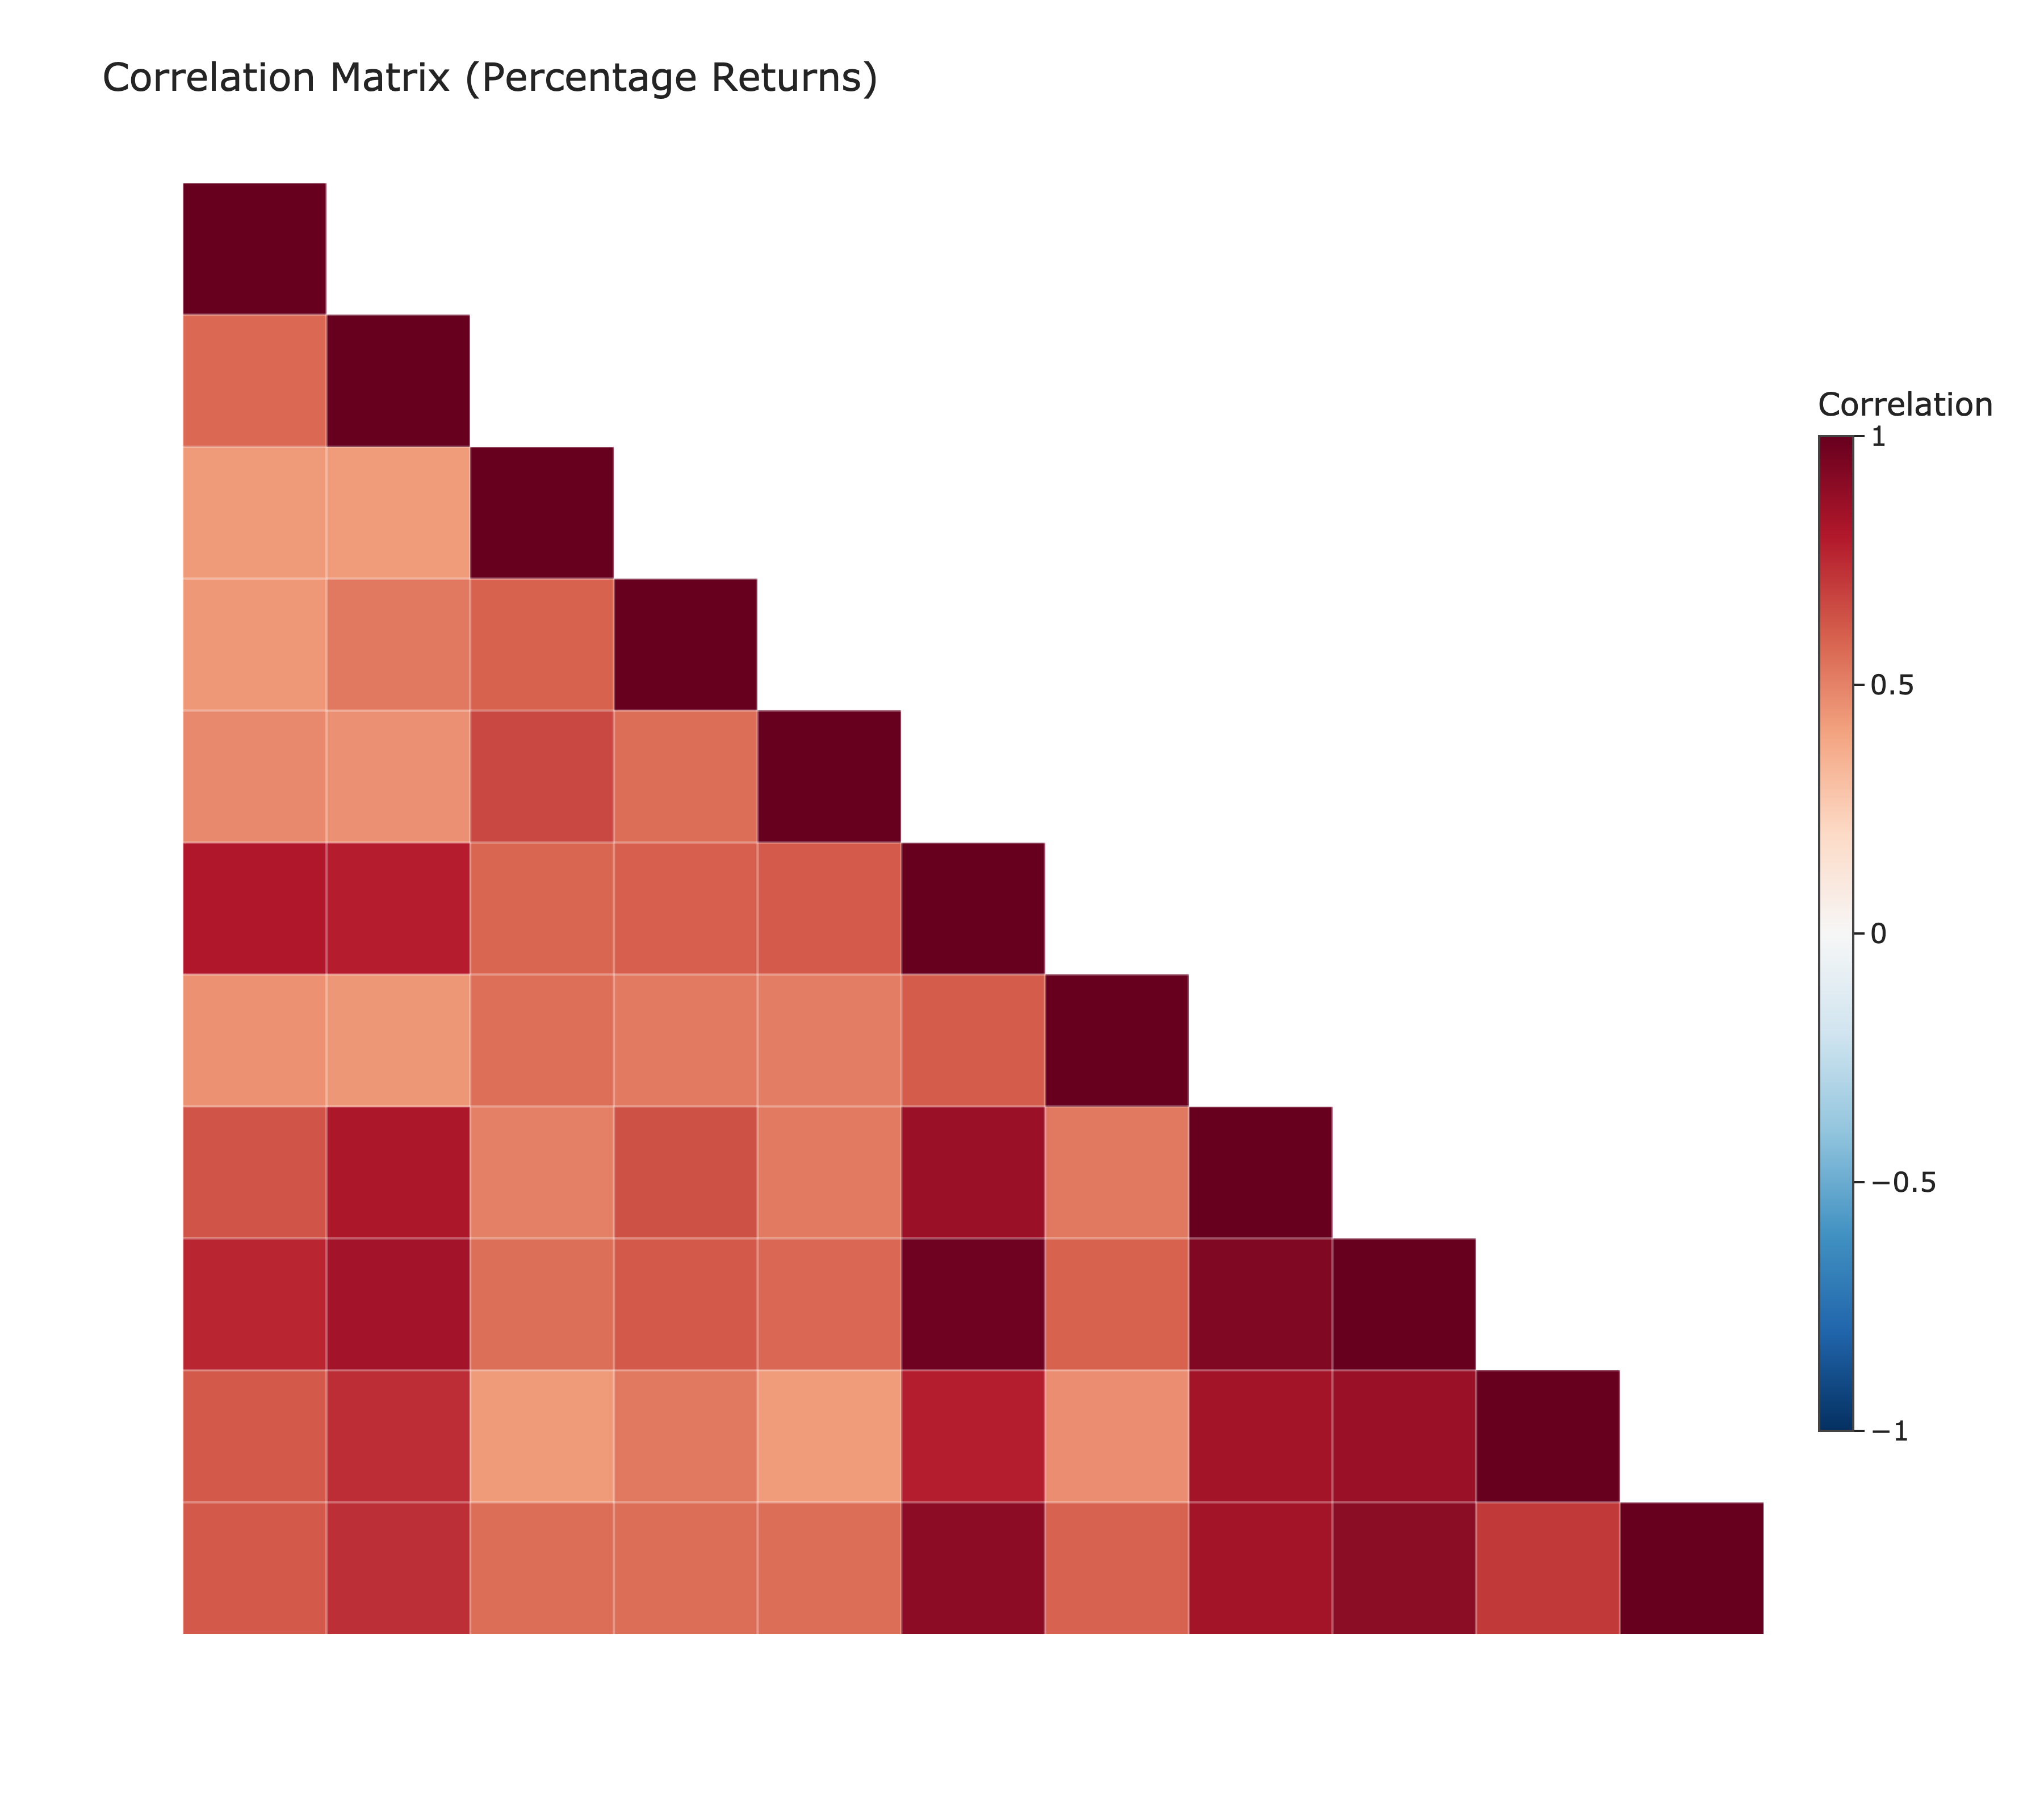

In [106]:
pv.plot_correlation_matrix(portfolio_matrix, interactive=False)

### Portfolio Metrics

In [ ]:
# Compute and display the AN VaR
asset_normal_results = pv.asset_normal_var(position_data=portfolio_matrix,
                                 confidence_level=confidence_level)

In [125]:
asset_normal_results.head(-4)

Diversified_VaR  Undiversified_VaR  Diversification_Benefit
Date                                                                   
2020-01-03     1.872037e+06       2.207425e+06            335387.869317
2020-01-06     1.880627e+06       2.217525e+06            336898.100297
2020-01-07     1.868661e+06       2.203422e+06            334760.674780
2020-01-08     1.884603e+06       2.222737e+06            338133.167629
2020-01-09     1.902105e+06       2.243020e+06            340914.811090
...                     ...                ...                      ...
2024-12-18     3.169420e+06       3.704434e+06            535013.960418
2024-12-19     3.190980e+06       3.727722e+06            536741.975253
2024-12-20     3.221026e+06       3.762715e+06            541689.240197
2024-12-23     3.221356e+06       3.763486e+06            542129.013884
2024-12-24     3.265017e+06       3.812699e+06            547682.465482

[1253 rows x 3 columns]


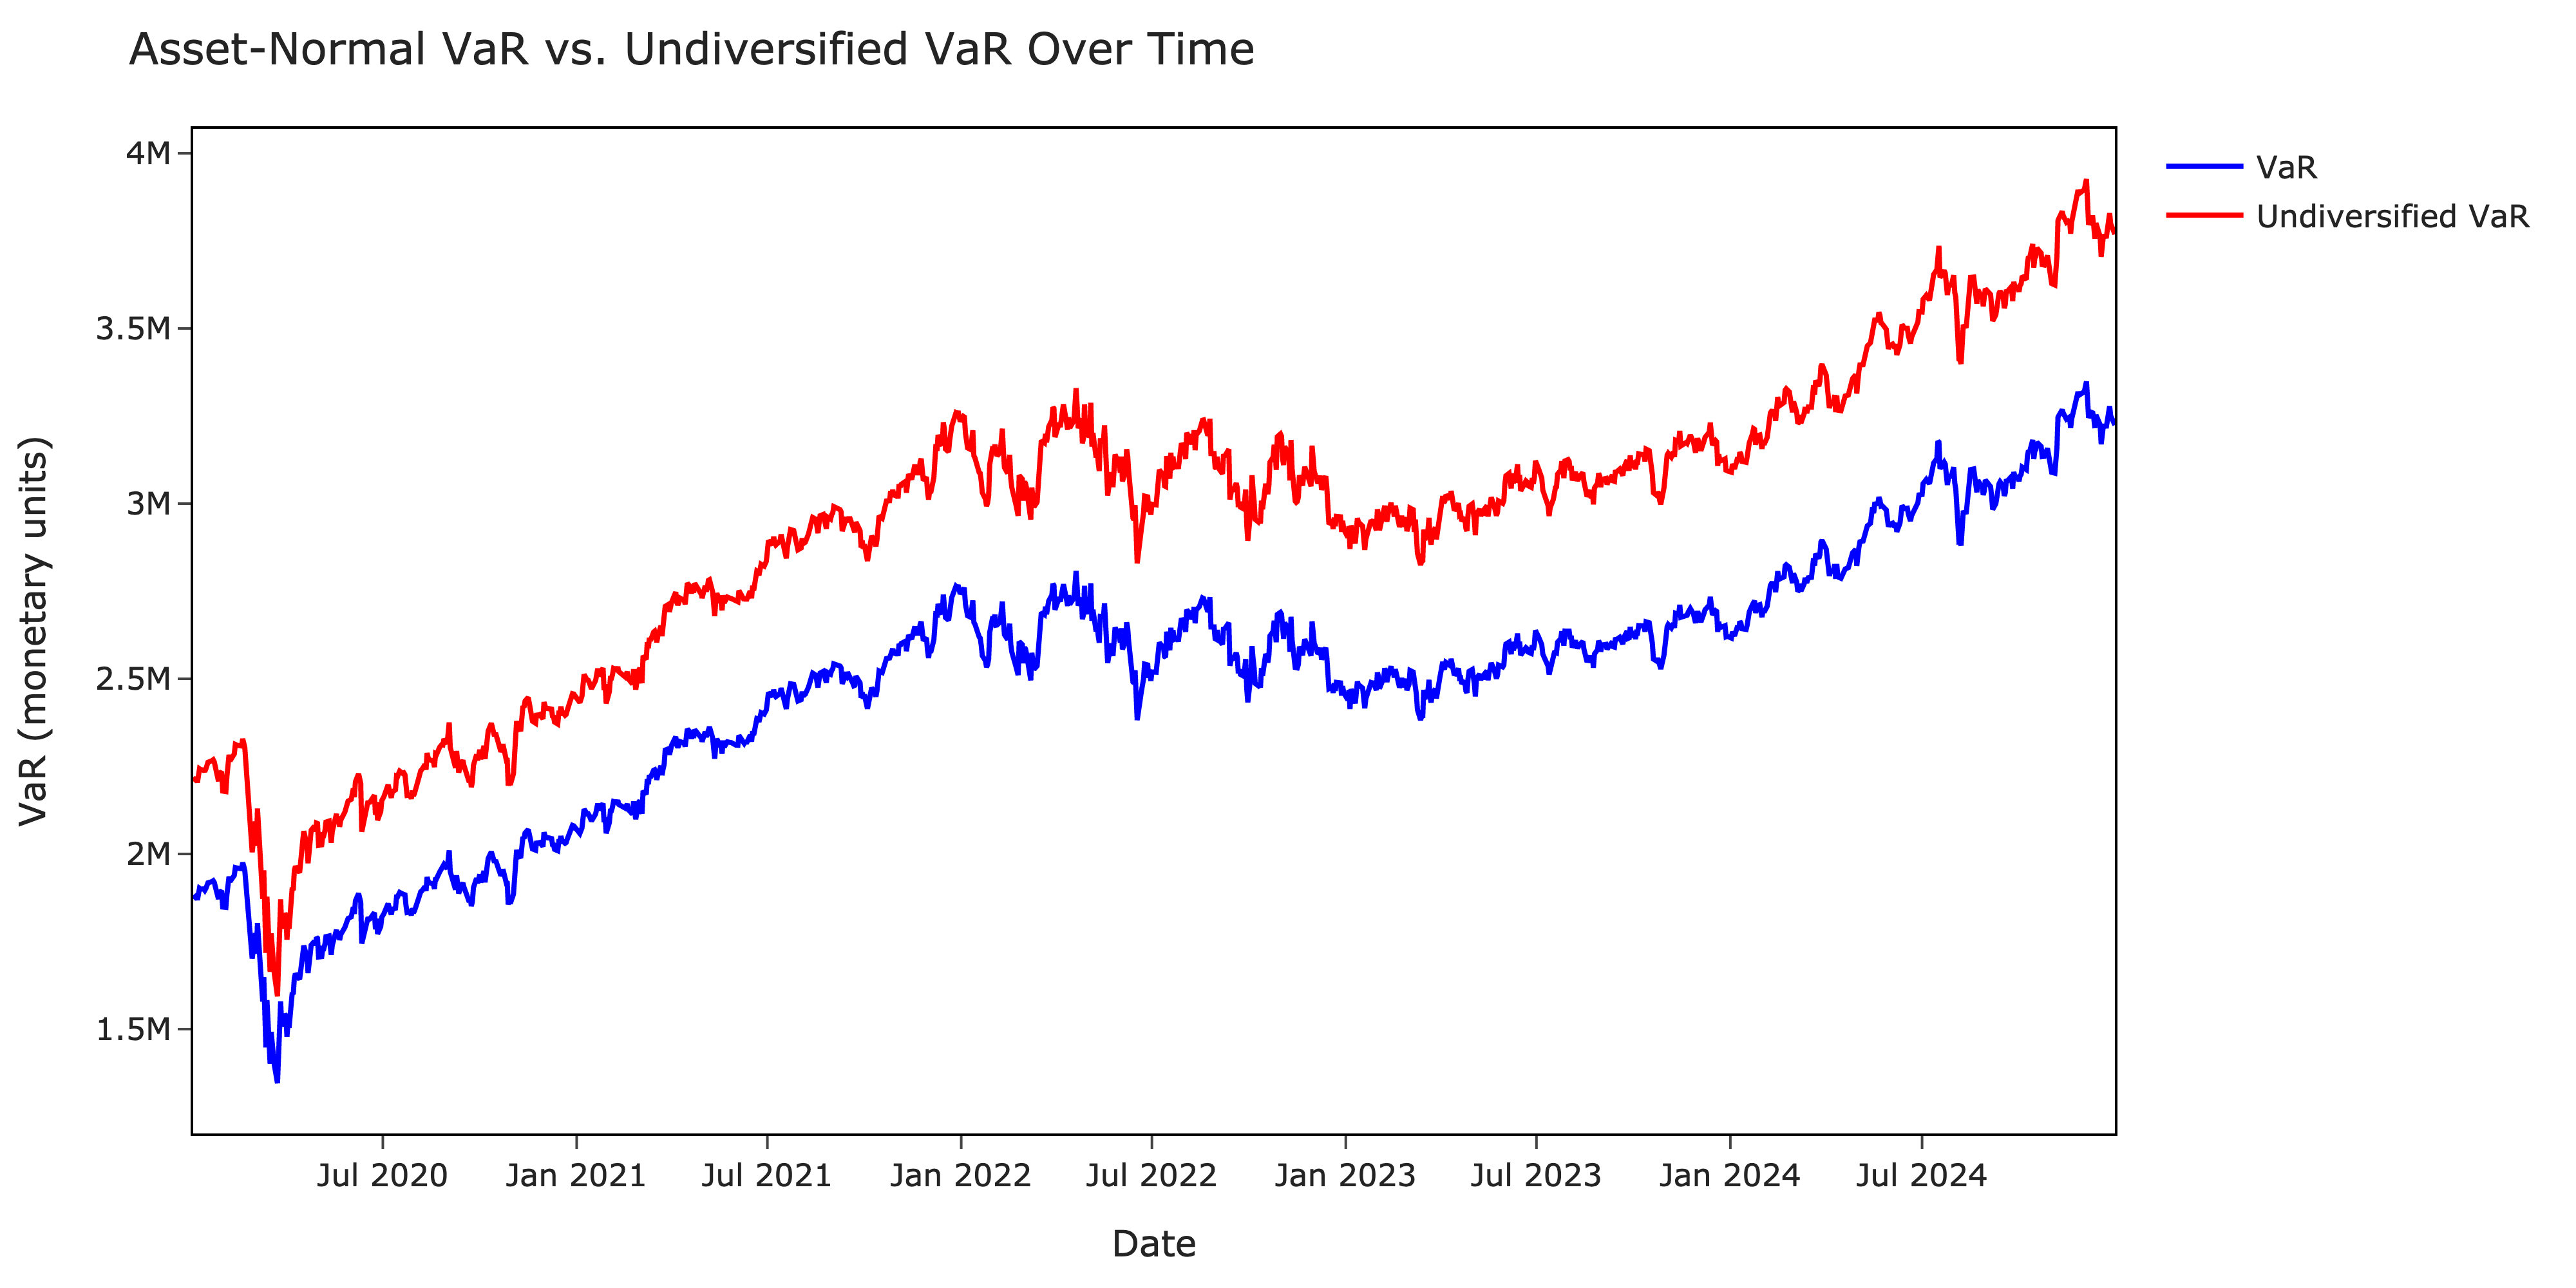

In [109]:
pv.plot_var_series(asset_normal_results, interactive=False)

In [110]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=portfolio_matrix,
    confidence_level=confidence_level
)

In [111]:
component_df.head()

AAPL           EWJ            JNJ           NVS  \
Date                                                                   
2020-01-03  131805.329777  49573.696999  130655.807972  48623.582201   
2020-01-06  132906.553187  49758.766150  130475.635600  48961.849797   
2020-01-07  131875.681123  49696.191046  130940.771222  48322.677536   
2020-01-08  134020.393834  49677.567177  130908.206216  48318.128637   
2020-01-09  137661.913927  50279.865023  131832.343541  48669.853741   

                      PG            SPY            UNH           VGK  \
Date                                                                   
2020-01-03  95118.587331  736885.218544  363157.796332  86347.079327   
2020-01-06  95250.209017  739885.074465  365911.284099  86690.365602   
2020-01-07  94375.365533  735580.426865  362451.080521  86000.352773   
2020-01-08  94771.690847  739428.678715  370937.479953  86188.875917   
2020-01-09  96255.888451  748173.156530  369826.396715  86695.060389   

                       VT           VWO           XLI  
Date                                                   
2020-01-03  260133.580018  39524.133575 -69787.883009  
2020-01-06  261157.836043  39460.468104 -69830.976632  
2020-01-07  259571.466194  39324.934859 -69477.837497  
2020-01-08  260572.985475  39487.497814 -69708.163423  
2020-01-09  263153.558093  39886.991216 -70329.840640


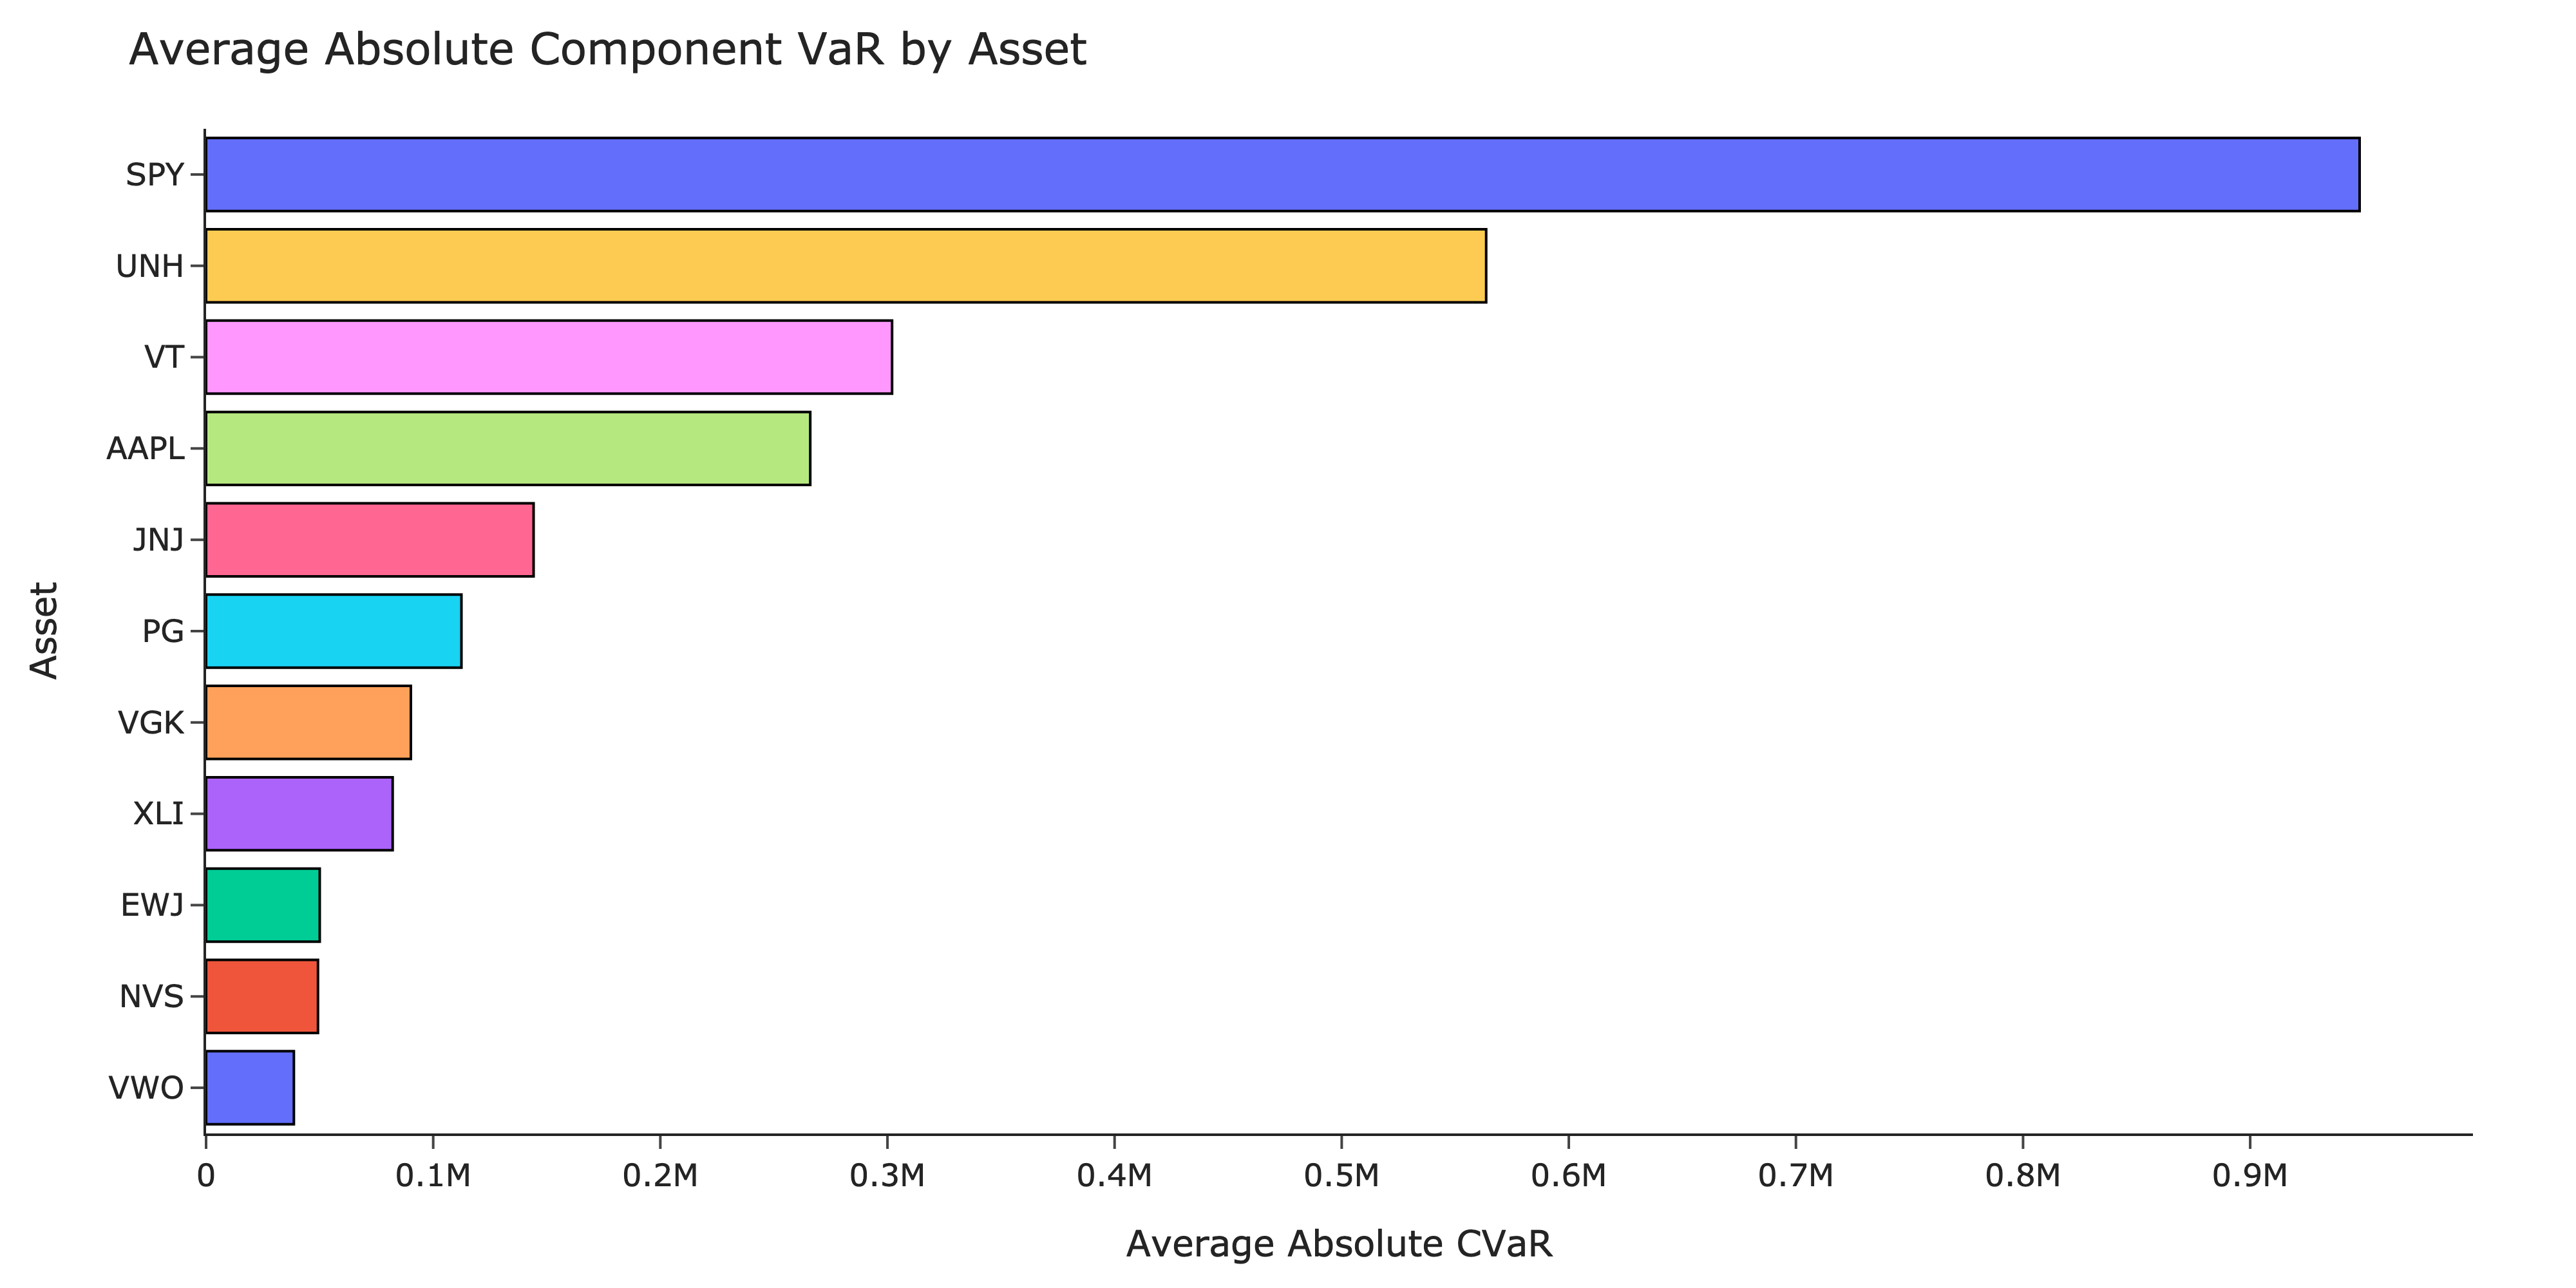

In [112]:
pv.plot_risk_contribution_bar(component_df, interactive=False)


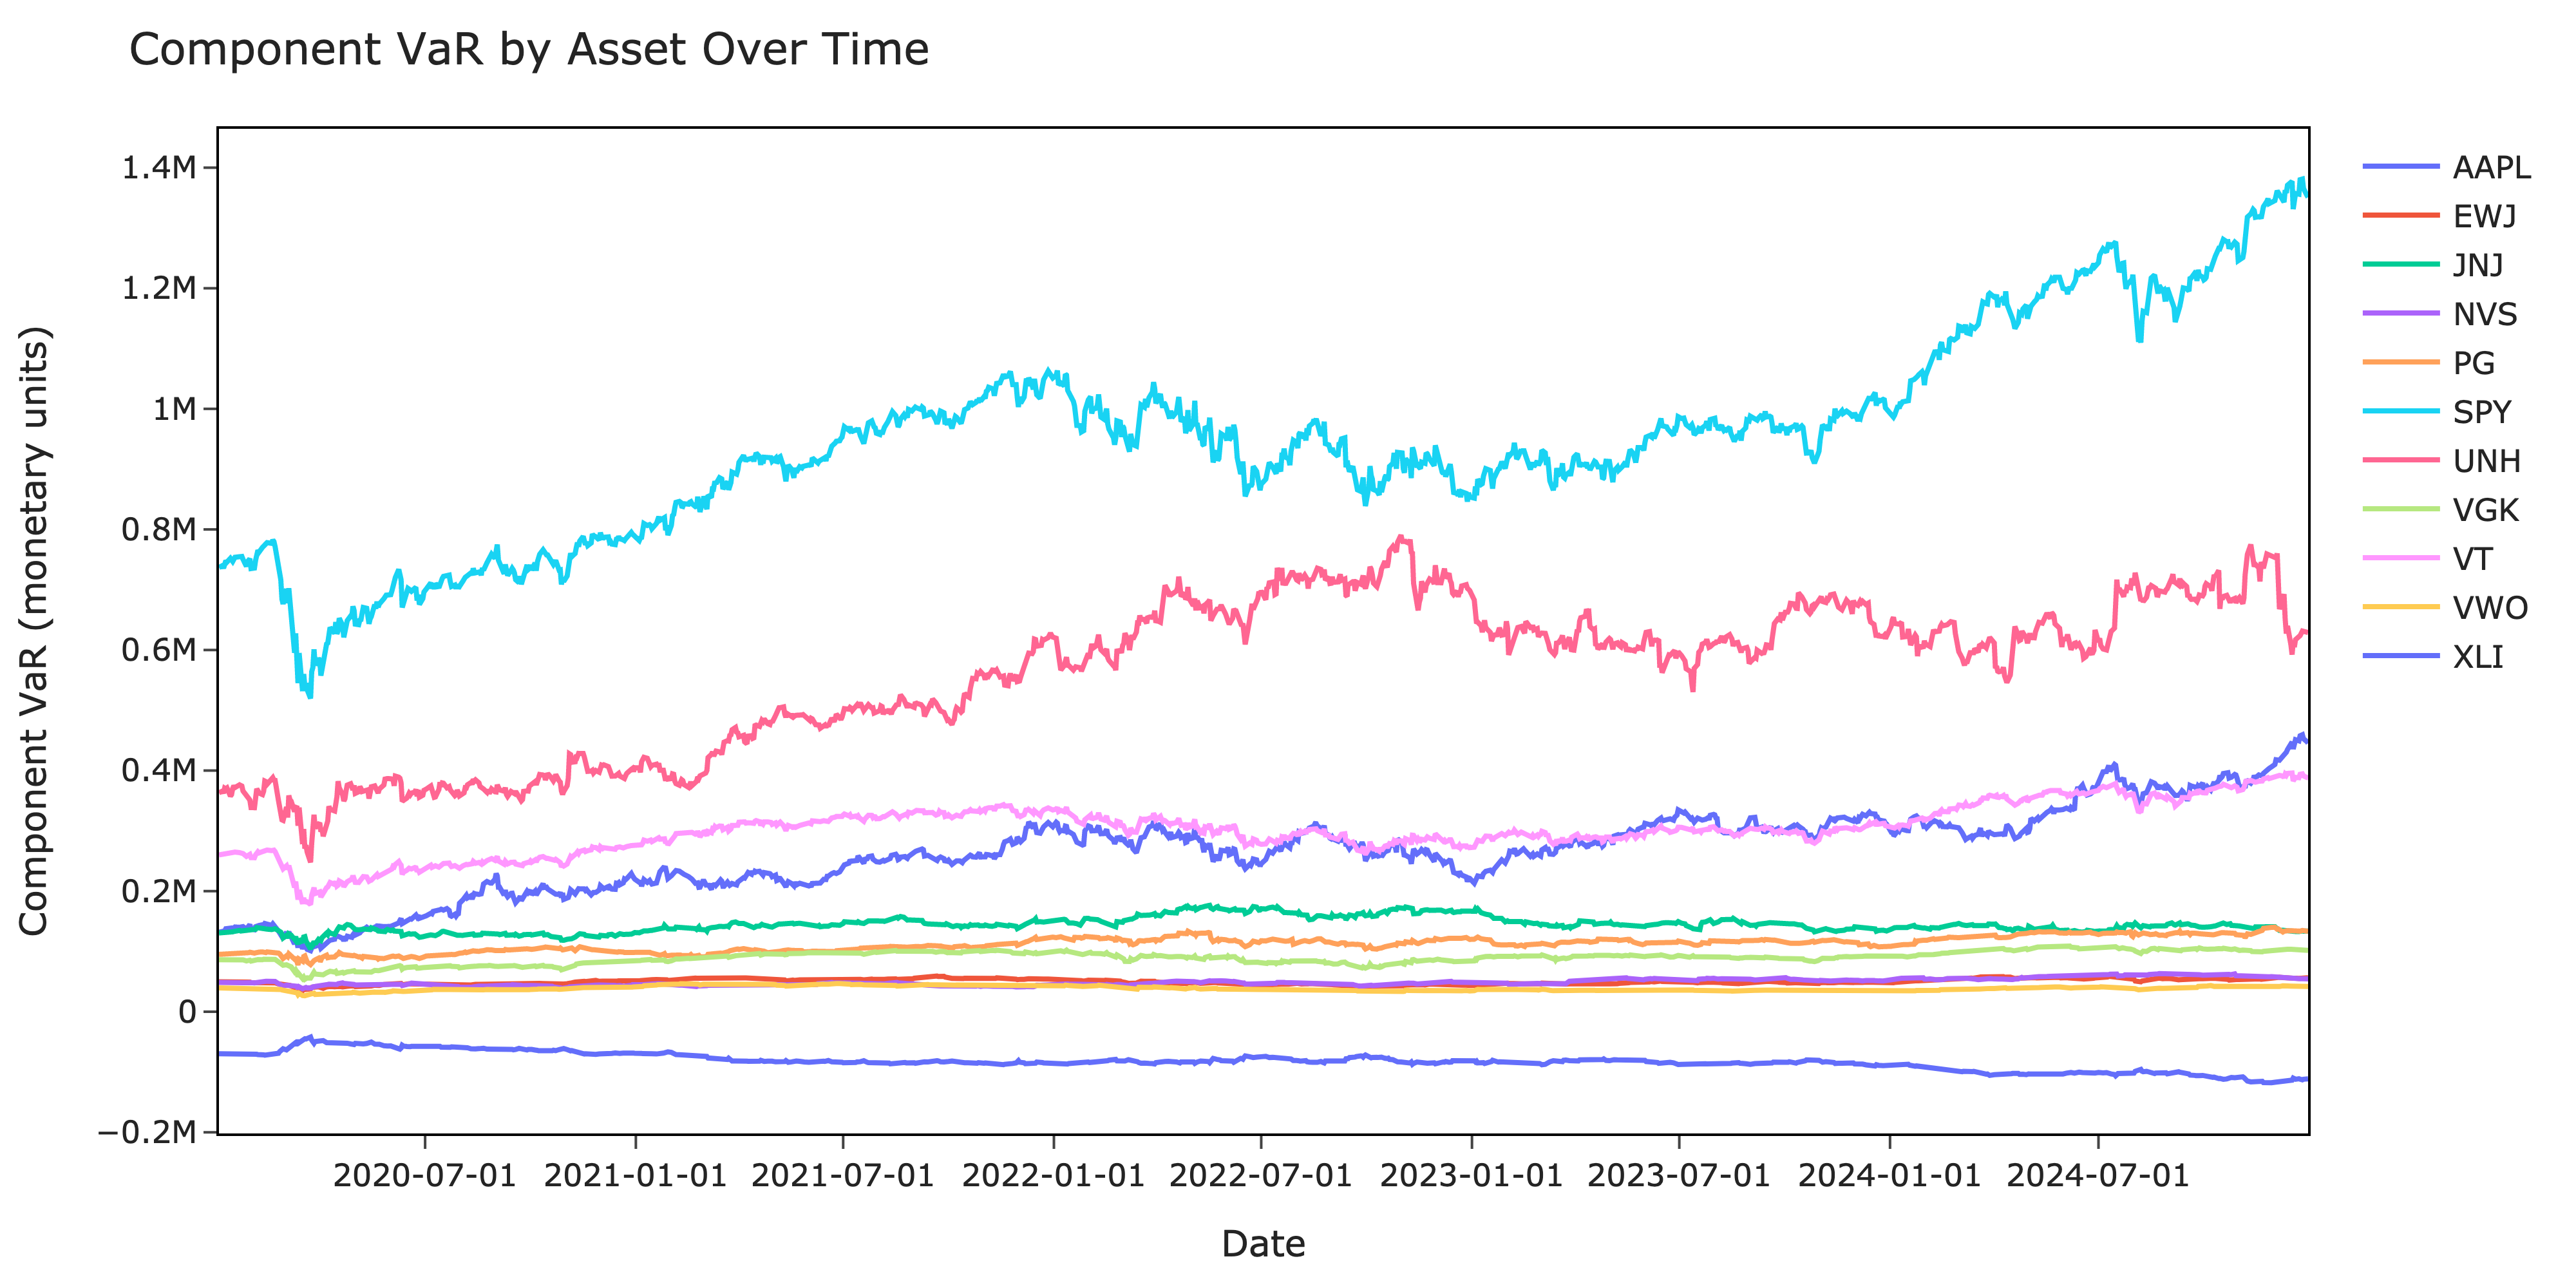

In [113]:
pv.plot_risk_contribution_lines(component_df, interactive=False)

In [ ]:
# Define change in position
change_vector = [0,10_000_000,0,0,0,0,0,0,0,0,0] # 10M CHF in SPY

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=portfolio_matrix,
    change_vector=change_vector,
    confidence_level=confidence_level
)

In [116]:
ivar_series

Date
2020-01-03    235339.795844
2020-01-06    235315.573839
2020-01-07    235346.618412
2020-01-08    235138.799759
2020-01-09    235260.851355
                  ...      
2024-12-24    232752.682029
2024-12-26    232674.065682
2024-12-27    232655.822845
2024-12-30    232612.313150
2024-12-31    232617.440312
Length: 1257, dtype: float64

### Time Varying Correlation Models

In [119]:
# Run RiskMetrics Correlation VaR
result_ewma_correlation = pv.ewma_correlation_var(portfolio_matrix, distribution="normal")

# ES RiskMetrics
result_ewma_correlation = pv.correlation_es(result_ewma_correlation)

In [124]:
result_ewma_correlation.head(-4)

Returns  Volatility       VaR  VaR Monetary  VaR Violation  \
2020-01-03 -0.005448    0.012613  0.029343  1.825253e+06          False   
2020-01-06  0.004278    0.012277  0.028562  1.784261e+06          False   
2020-01-07 -0.006072    0.011993  0.027899  1.732276e+06          False   
2020-01-08  0.007745    0.011791  0.027430  1.716240e+06          False   
2020-01-09  0.009379    0.011659  0.027123  1.712876e+06          False   
...              ...         ...       ...           ...            ...   
2024-12-18 -0.017217    0.008254  0.019201  1.950570e+06          False   
2024-12-19  0.006921    0.008161  0.018985  1.941748e+06          False   
2024-12-20  0.008460    0.008192  0.019058  1.965609e+06          False   
2024-12-23  0.000021    0.007949  0.018493  1.907339e+06          False   
2024-12-24  0.013325    0.008366  0.019461  2.033949e+06          False   

                  ES   ES Monetary  
2020-01-03  0.033617  2.091127e+06  
2020-01-06  0.032722  2.044165e+06  
2020-01-07  0.031963  1.984608e+06  
2020-01-08  0.031425  1.966235e+06  
2020-01-09  0.031074  1.962381e+06  
...              ...           ...  
2024-12-18  0.021998  2.234699e+06  
2024-12-19  0.021750  2.224592e+06  
2024-12-20  0.021834  2.251928e+06  
2024-12-23  0.021186  2.185171e+06  
2024-12-24  0.022296  2.330224e+06  

[1253 rows x 7 columns]


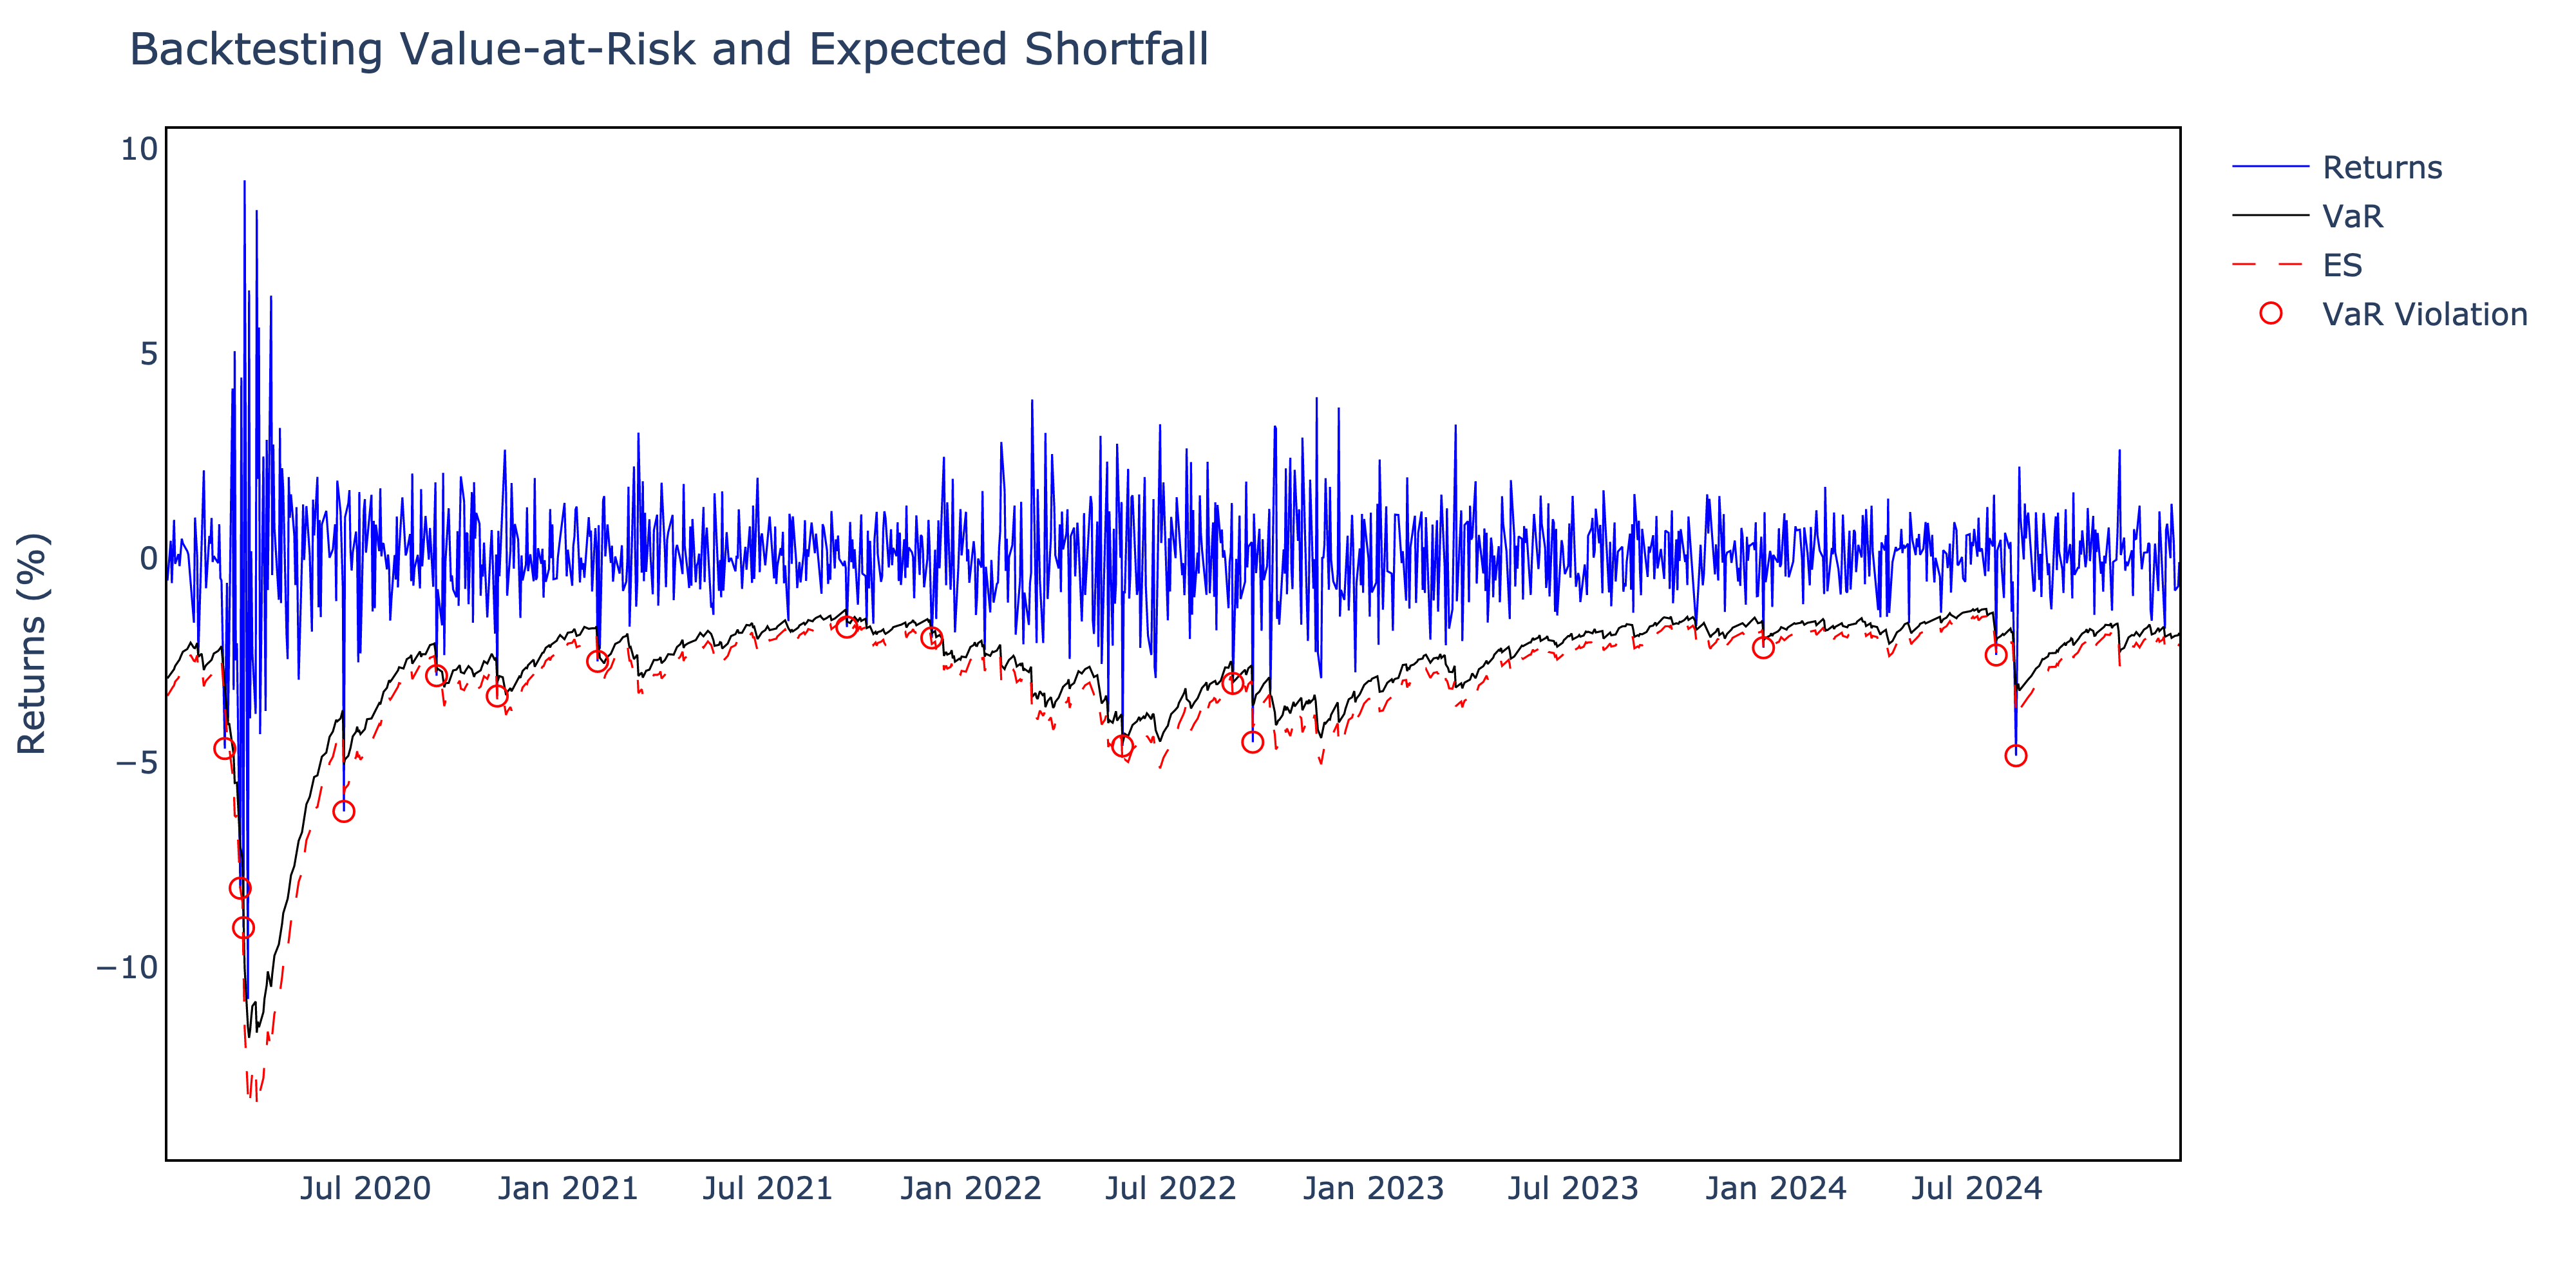

In [123]:
# Plot RiskMetrics model results
fig_rm_es = pv.plot_backtest(result_ewma_correlation, interactive=False)

In [122]:
# Count violations
ewma_corr_violations, ewma_corr_violation_rate = pv.count_violations(result_ewma_correlation)

# Kupiec Test (Unconditional Coverage)
ewma_corr_kupiec = pv.kupiec_test(
    total_violations=ewma_corr_violations,
    total_days=len(result_ewma_correlation),
    confidence_level=confidence_level
)

# Christoffersen Test (Independence)
ewma_corr_christoffersen = pv.christoffersen_test(result_ewma_correlation)

# Joint Test (Conditional Coverage)
ewma_corr_joint = pv.joint_lr_test(
    LR_uc=ewma_corr_kupiec["LR_uc"],
    LR_c=ewma_corr_christoffersen["LR_c"]
)

# Summary output
print(f"\n--- RiskMetrics Correlation VaR Backtesting Summary ---")
print(f"Total Violations     : {ewma_corr_violations}")
print(f"Violation Rate       : {ewma_corr_violation_rate * 100:.2f}%\n")

print("Kupiec Test (UC):")
print(f"LR_uc               : {ewma_corr_kupiec['LR_uc']:.4f}")
print(f"p-value             : {ewma_corr_kupiec['p_value']:.4f}")
print(f"Reject Null (5%)    : {ewma_corr_kupiec['reject_null']}")

print("\nChristoffersen Test (Independence):")
print(f"LR_c                : {ewma_corr_christoffersen['LR_c']:.4f}")
print(f"p-value             : {ewma_corr_christoffersen['p_value']:.4f}")
print(f"Reject Null (5%)    : {ewma_corr_christoffersen['reject_null']}")

print("\nJoint Test (Conditional Coverage):")
print(f"LR_total            : {ewma_corr_joint['LR_total']:.4f}")
print(f"p-value             : {ewma_corr_joint['p_value']:.4f}")
print(f"Reject Null (5%)    : {ewma_corr_joint['reject_null']}")



--- RiskMetrics Correlation VaR Backtesting Summary ---
Total Violations     : 15
Violation Rate       : 1.19%

Kupiec Test (UC):
LR_uc               : 0.4469
p-value             : 0.5038
Reject Null (5%)    : False

Christoffersen Test (Independence):
LR_c                : 0.3626
p-value             : 0.5471
Reject Null (5%)    : False

Joint Test (Conditional Coverage):
LR_total            : 0.8095
p-value             : 0.6671
Reject Null (5%)    : False


### Simulations

Start by defining options.